In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 


## Comparing with three different interval timeframe 
Here I'll compare the three dataframes of 5 minutes, 15 minutes and 30 minutes interval and make compare about the nature of data to ensure with which I can move further to predict which can give me relatively better result than others two.

### EDA

Shape of your Data Set loaded: (10000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    7 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['time', 'real_volume']

################ Regression problem ########

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
open,float64,0.000000,NA,58854.320000,71905.550000,Column has 237 outliers greater than upper bound (74039.12) or lower than lower bound(61485.03). Cap them or remove them.
high,float64,0.000000,NA,59145.470000,71933.660000,"Column has 232 outliers greater than upper bound (74089.25) or lower than lower bound(61504.51). Cap them or remove them., Column has a high correlation with ['open']. Consider dropping one of them."
low,float64,0.000000,NA,58384.530000,71833.510000,"Column has 242 outliers greater than upper bound (73980.33) or lower than lower bound(61477.78). Cap them or remove them., Column has a high correlation with ['open', 'high']. Consider dropping one of them."
tick_volume,int64,0.000000,16,3.000000,1962.000000,Column has 13 outliers greater than upper bound (1867.00) or lower than lower bound(-333.00). Cap them or remove them.
spread,int64,0.000000,19,0.000000,5373.000000,Column has 318 outliers greater than upper bound (2327.62) or lower than lower bound(-105.38). Cap them or remove them.
close,float64,0.000000,98,58849.240000,71905.200000,Target column


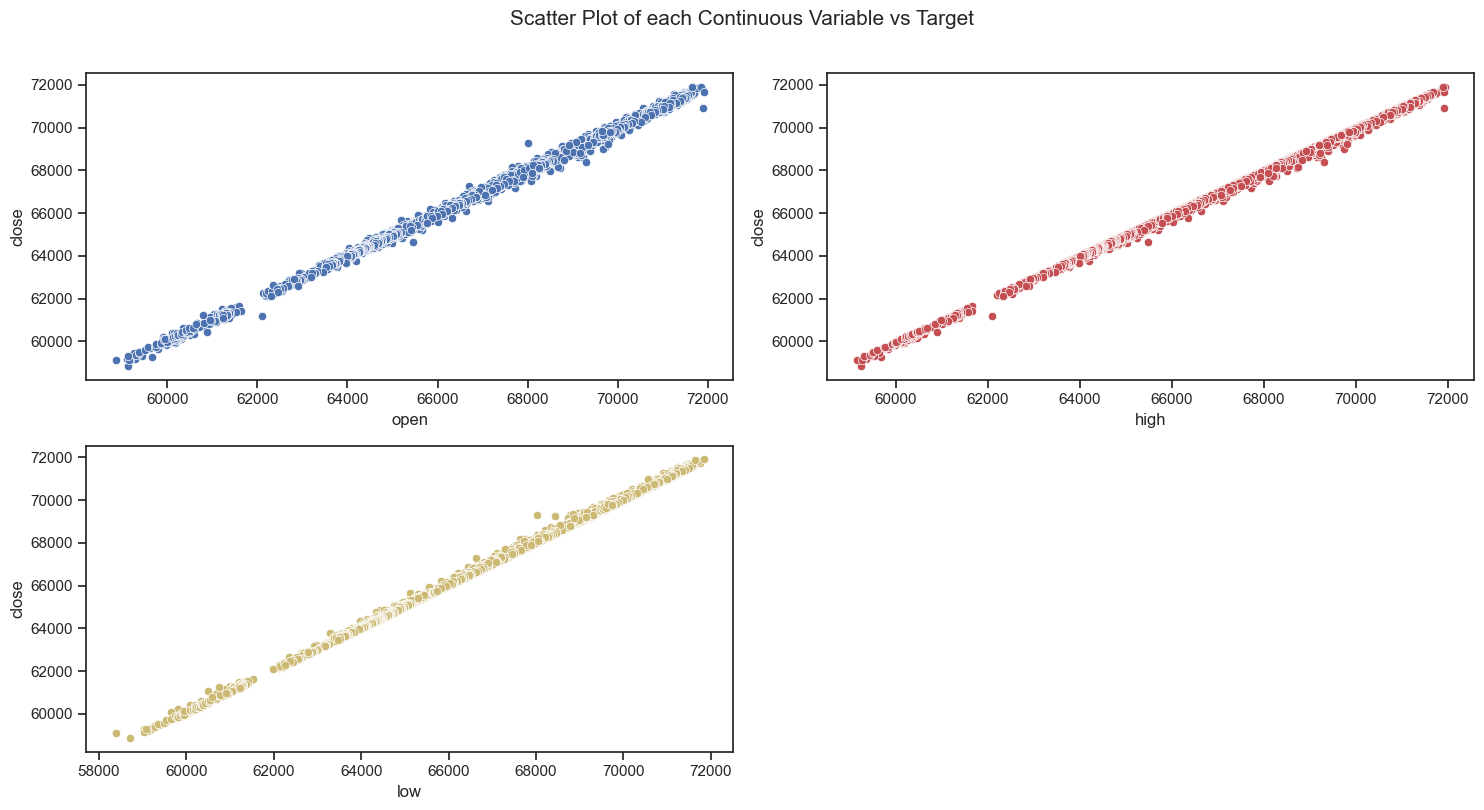

Number of All Scatter Plots = 6


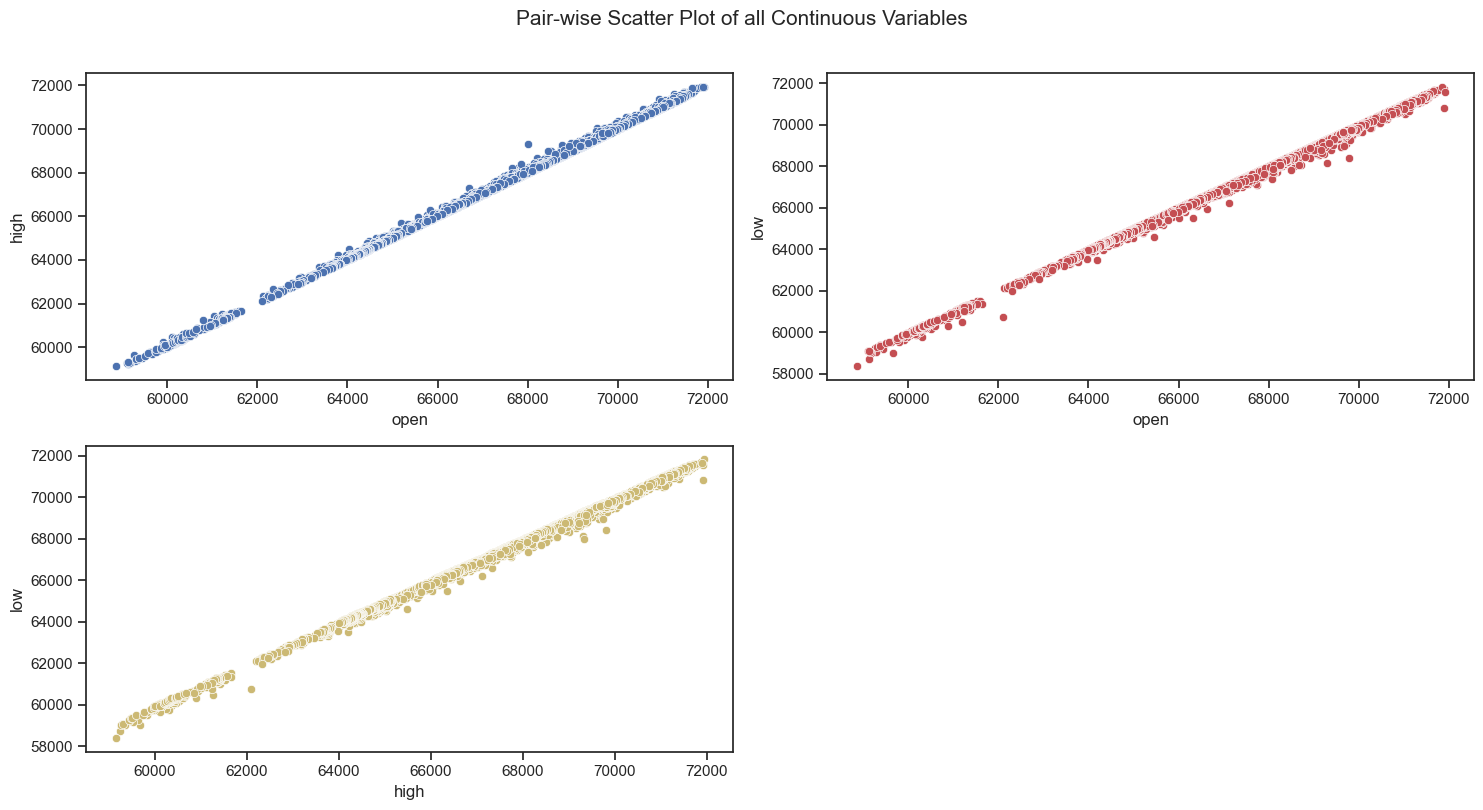

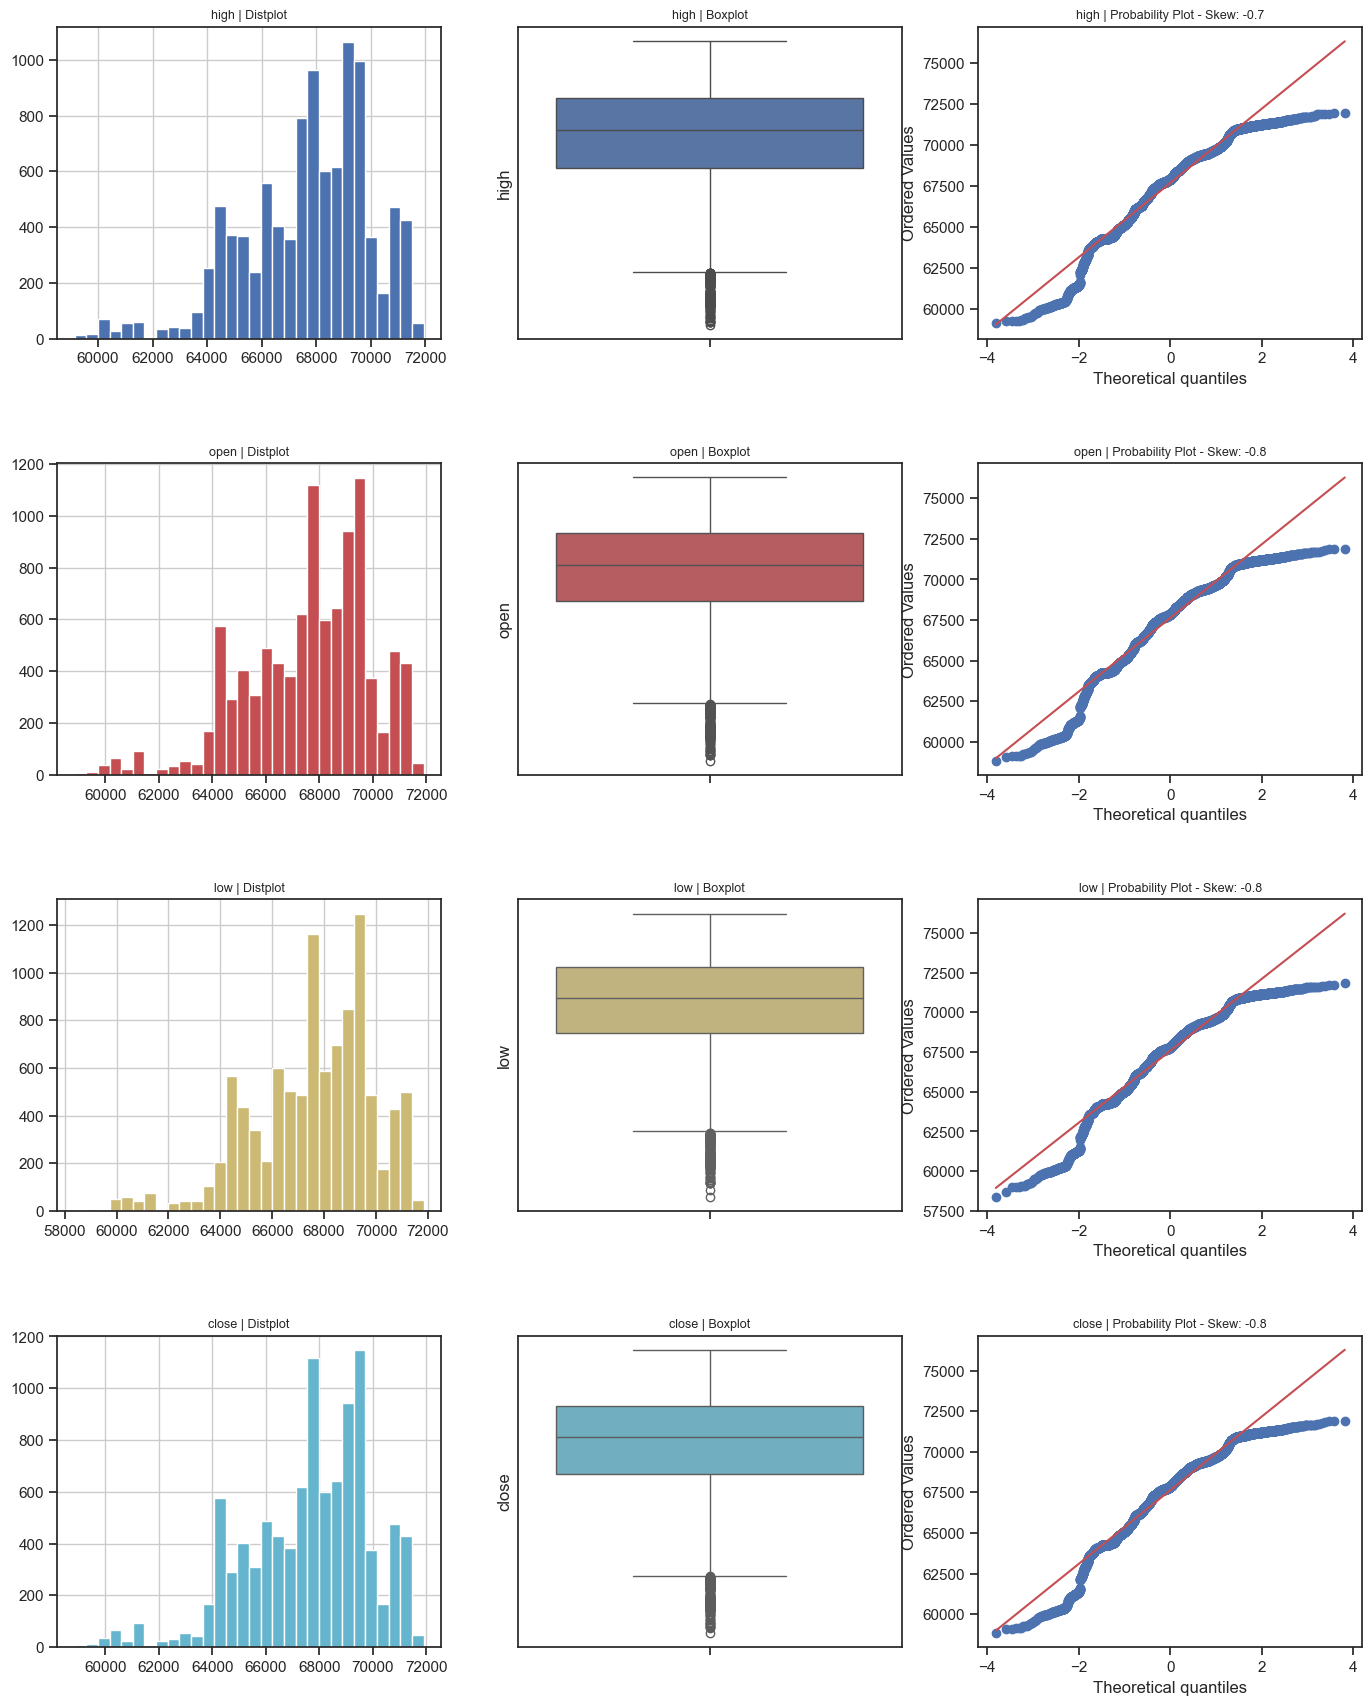

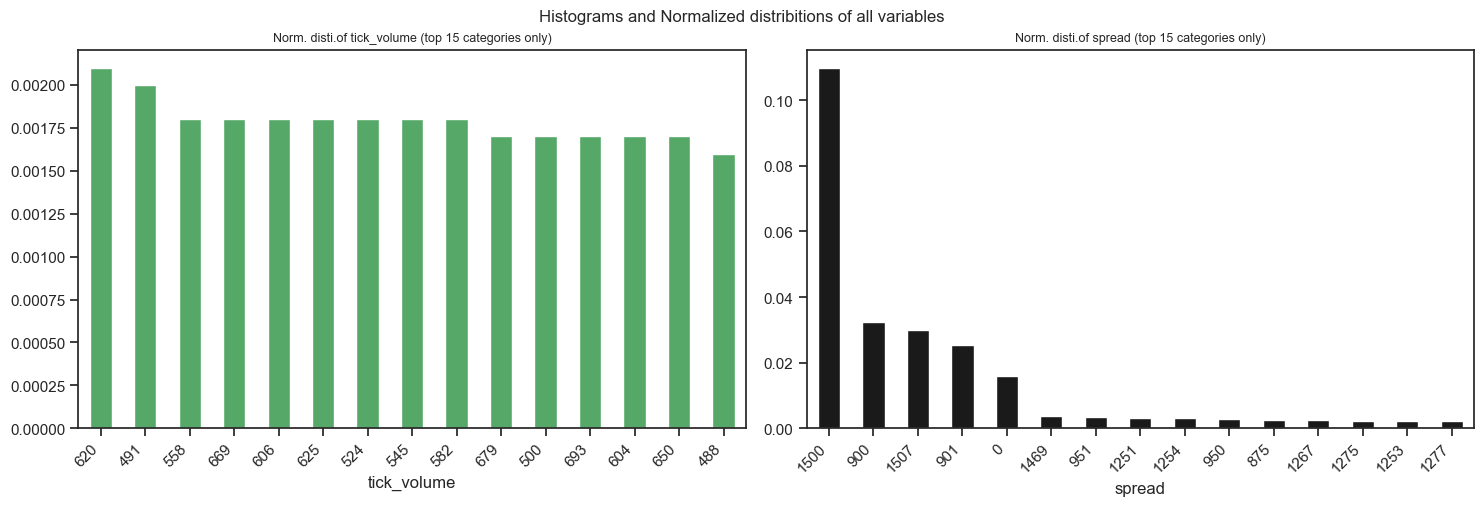

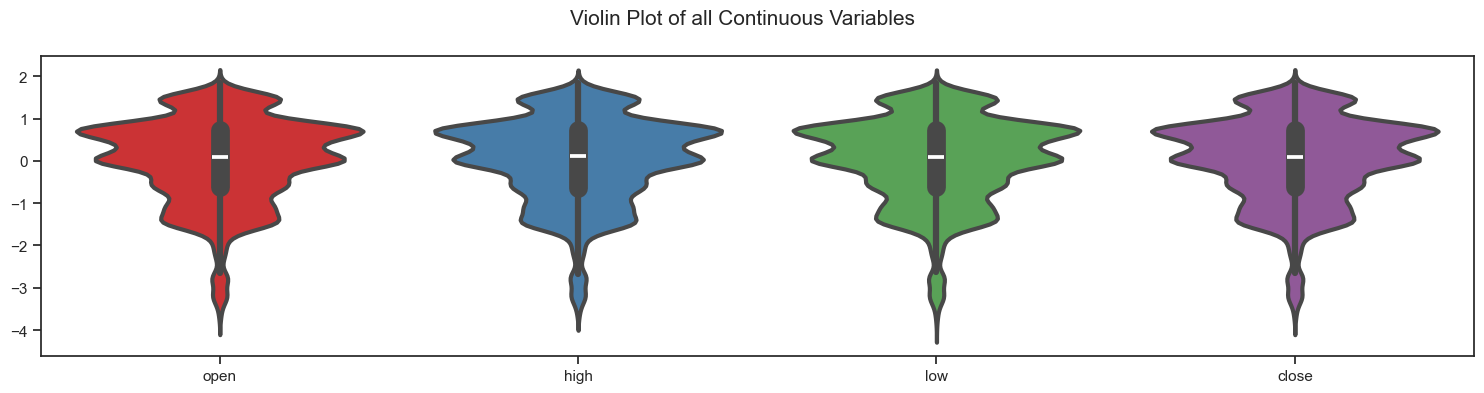

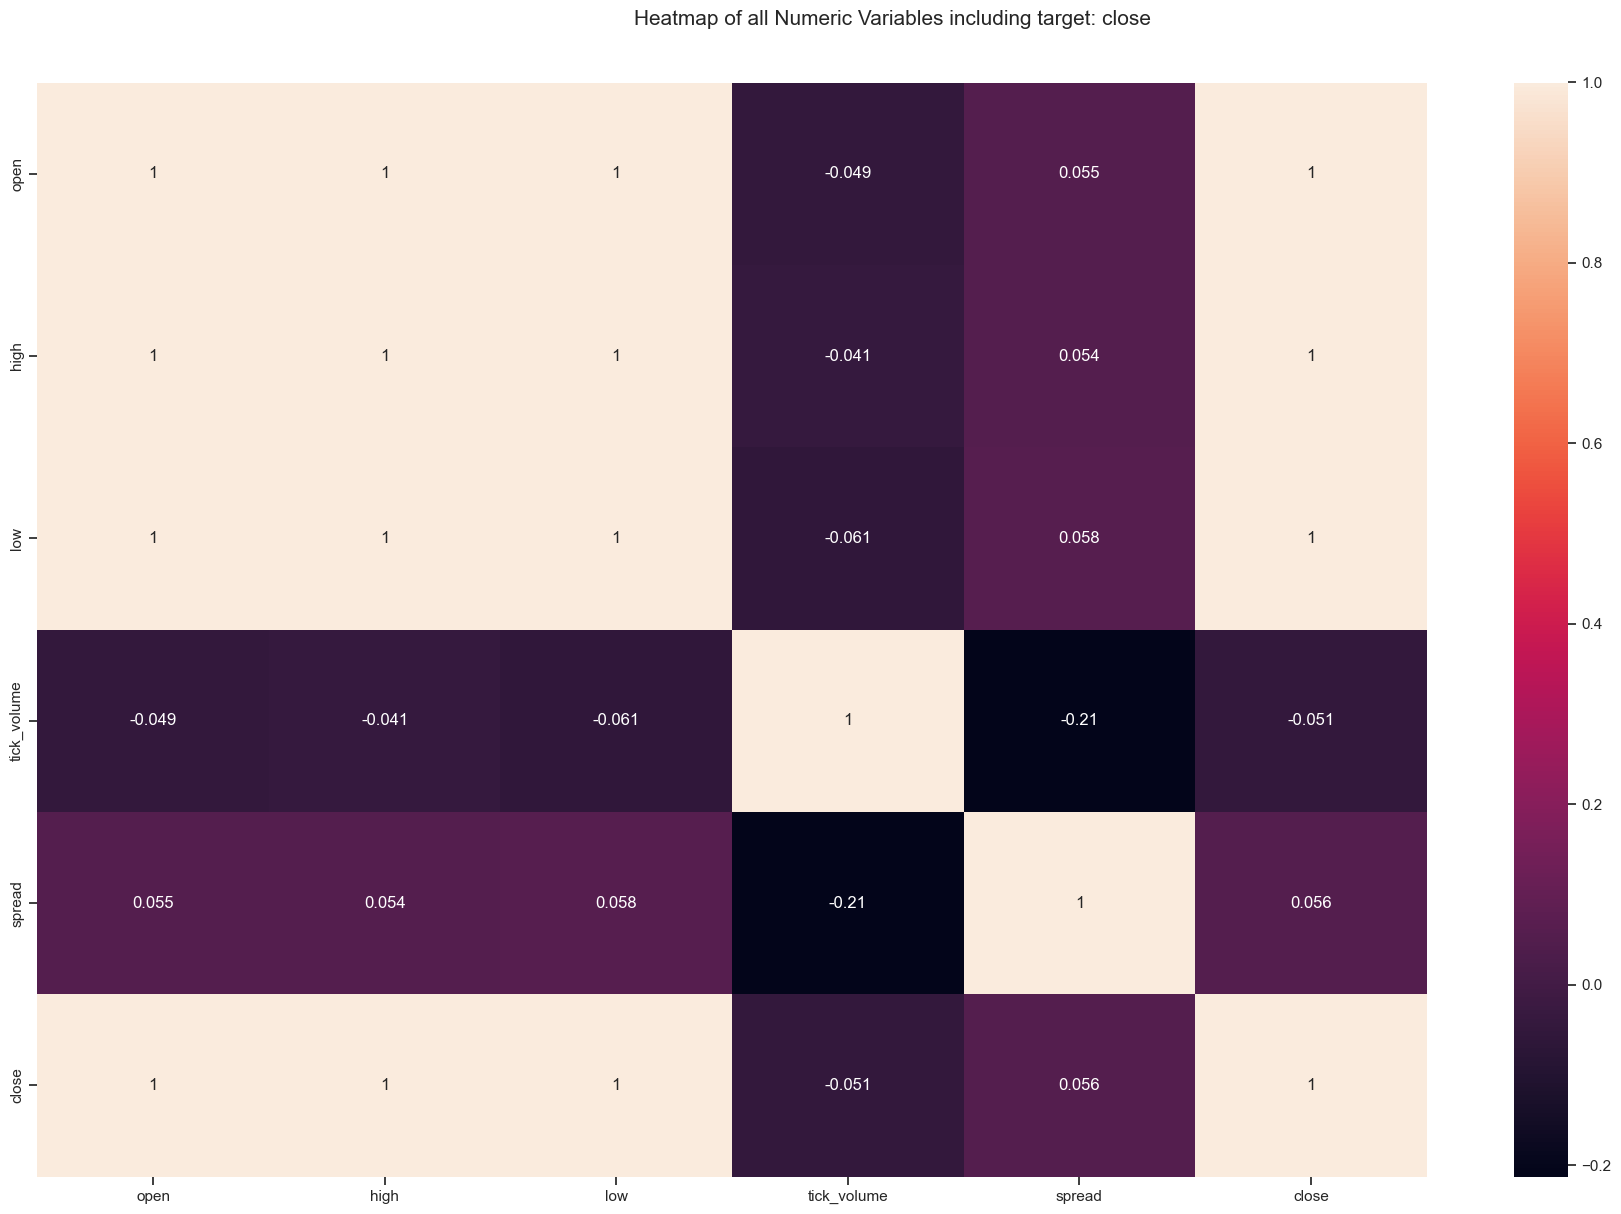

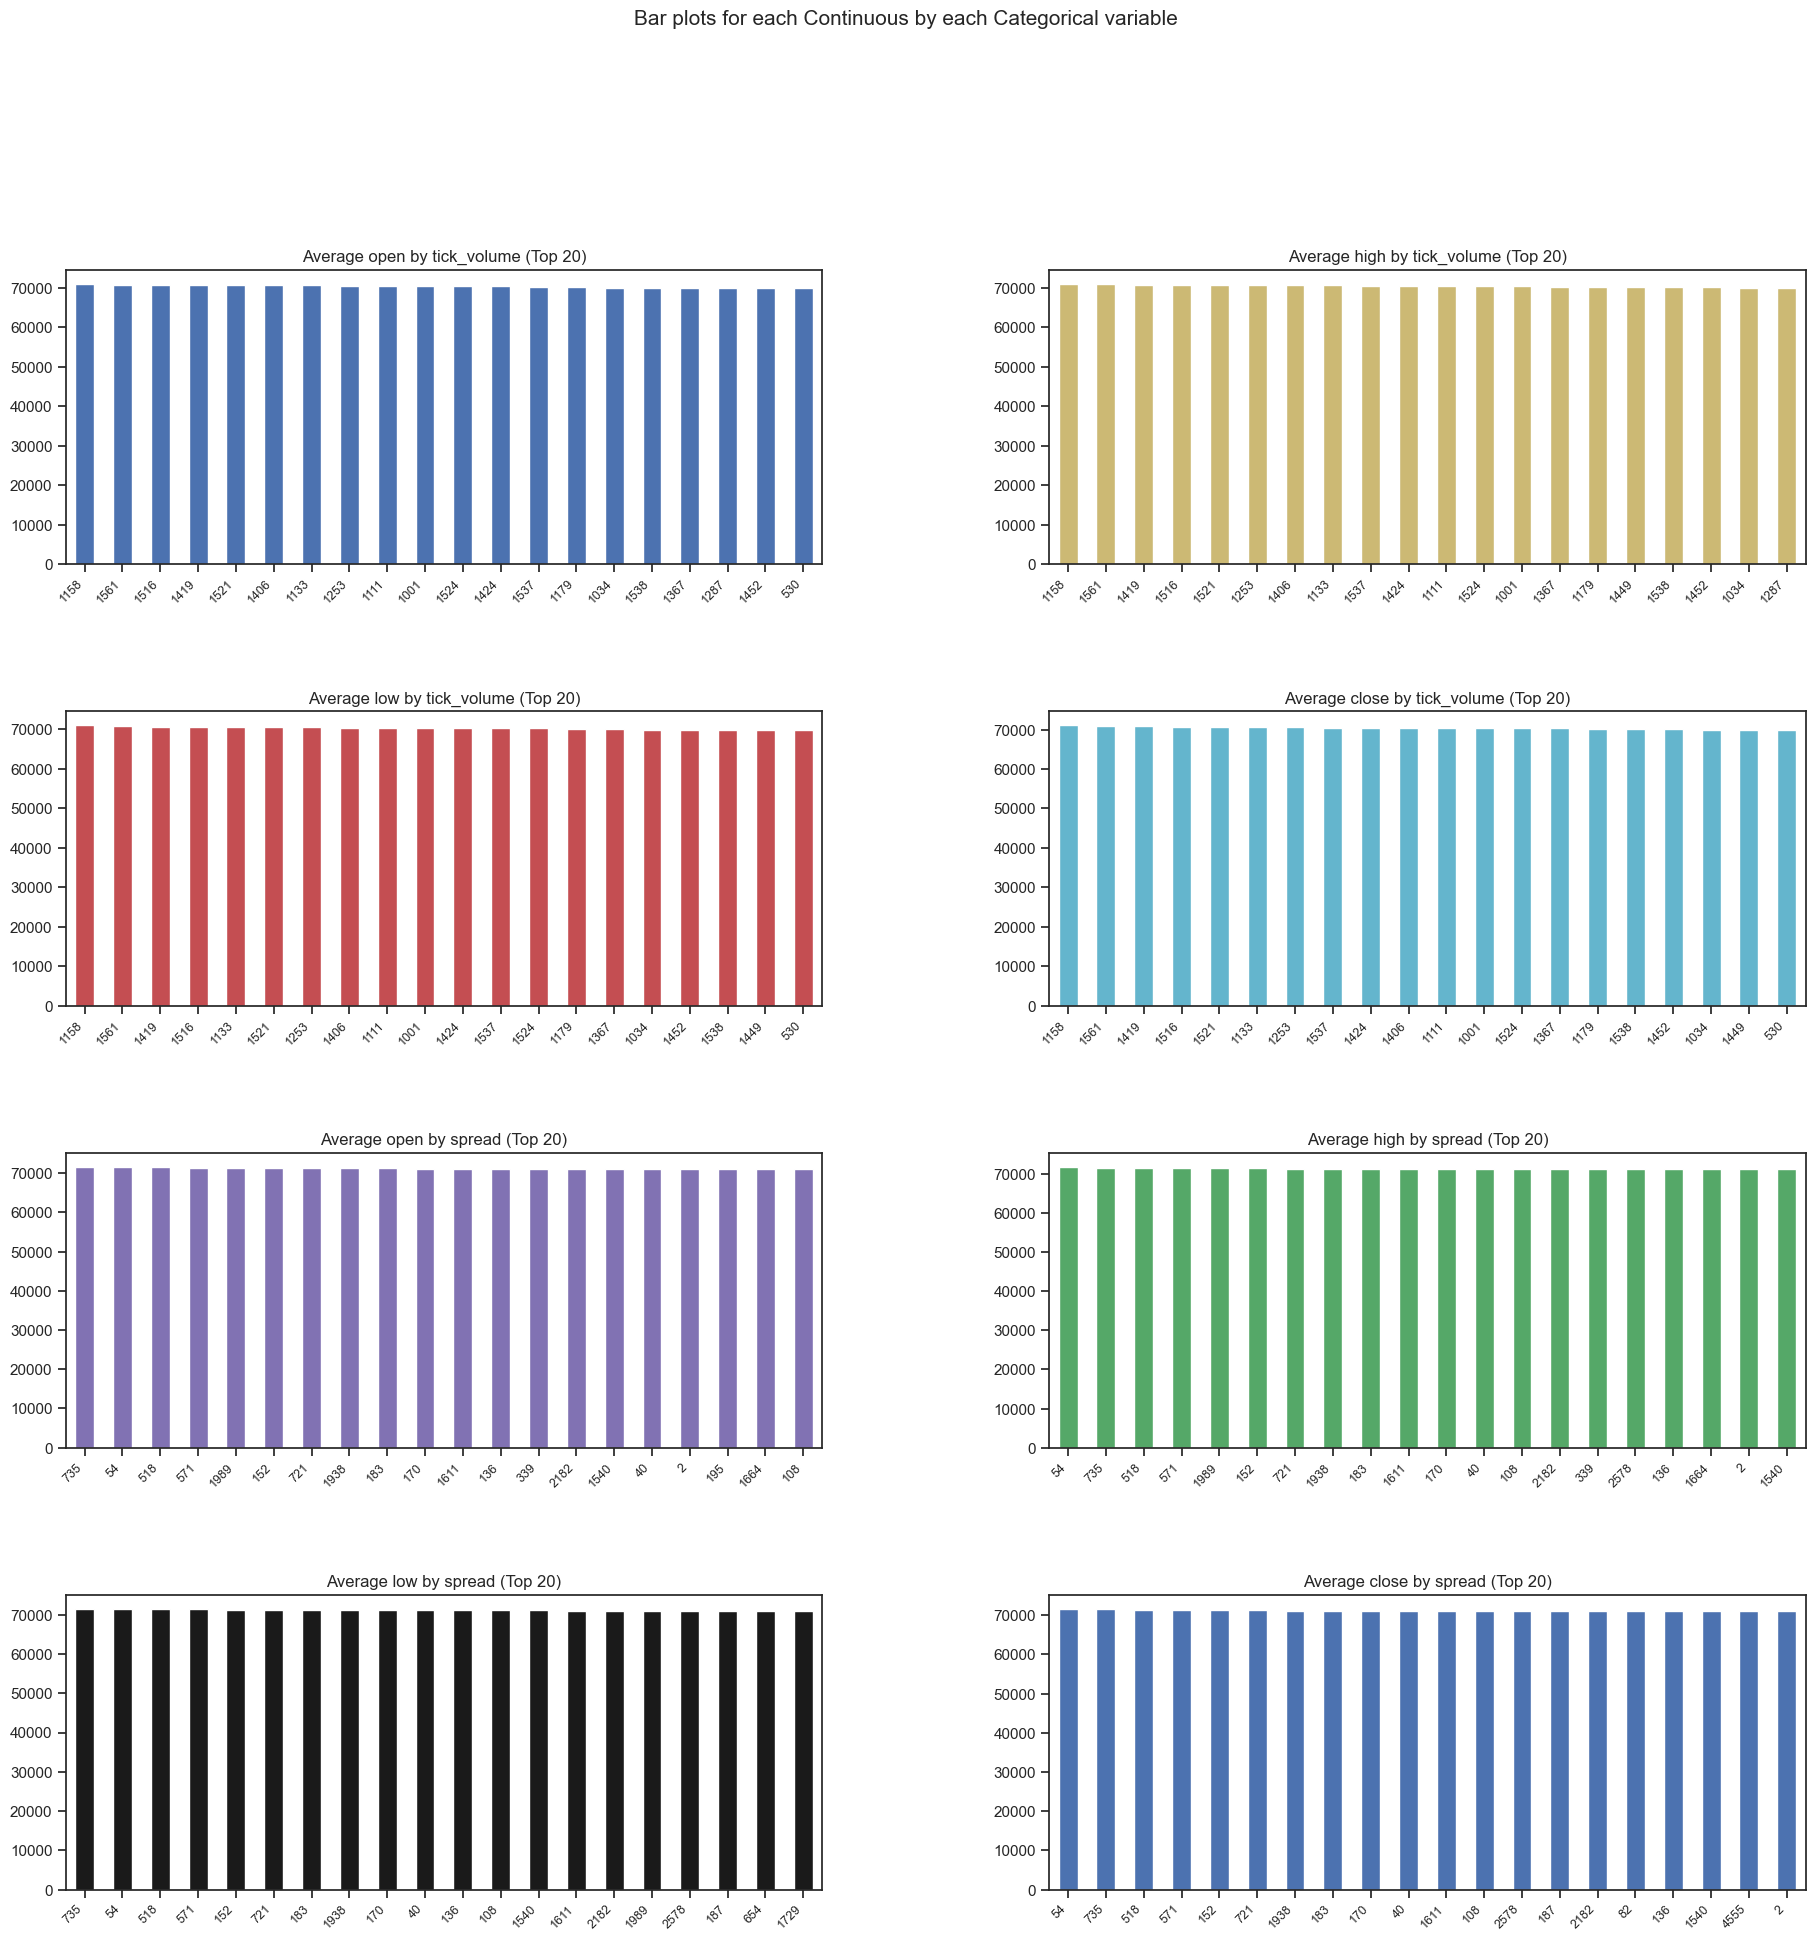

All Plots done
Time to run AutoViz = 12 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [5]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

dft = AV.AutoViz(
    'data_5.csv',
    sep=",",
    depVar="close",
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="jpg",
    save_plot_dir=None
)

Shape of your Data Set loaded: (10000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    7 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['time', 'real_volume']

################ Regression problem ########

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
open,float64,0.000000,NA,56687.160000,73646.490000,No issue
high,float64,0.000000,NA,56918.000000,73843.750000,Column has a high correlation with ['open']. Consider dropping one of them.
low,float64,0.000000,NA,56448.280000,73439.480000,"Column has a high correlation with ['open', 'high']. Consider dropping one of them."
tick_volume,int64,0.000000,43,3.000000,6576.000000,No issue
spread,int64,0.000000,18,0.000000,24750.000000,Column has 140 outliers greater than upper bound (2489.50) or lower than lower bound(-522.50). Cap them or remove them.
close,float64,0.000000,99,56689.660000,73646.400000,Target column


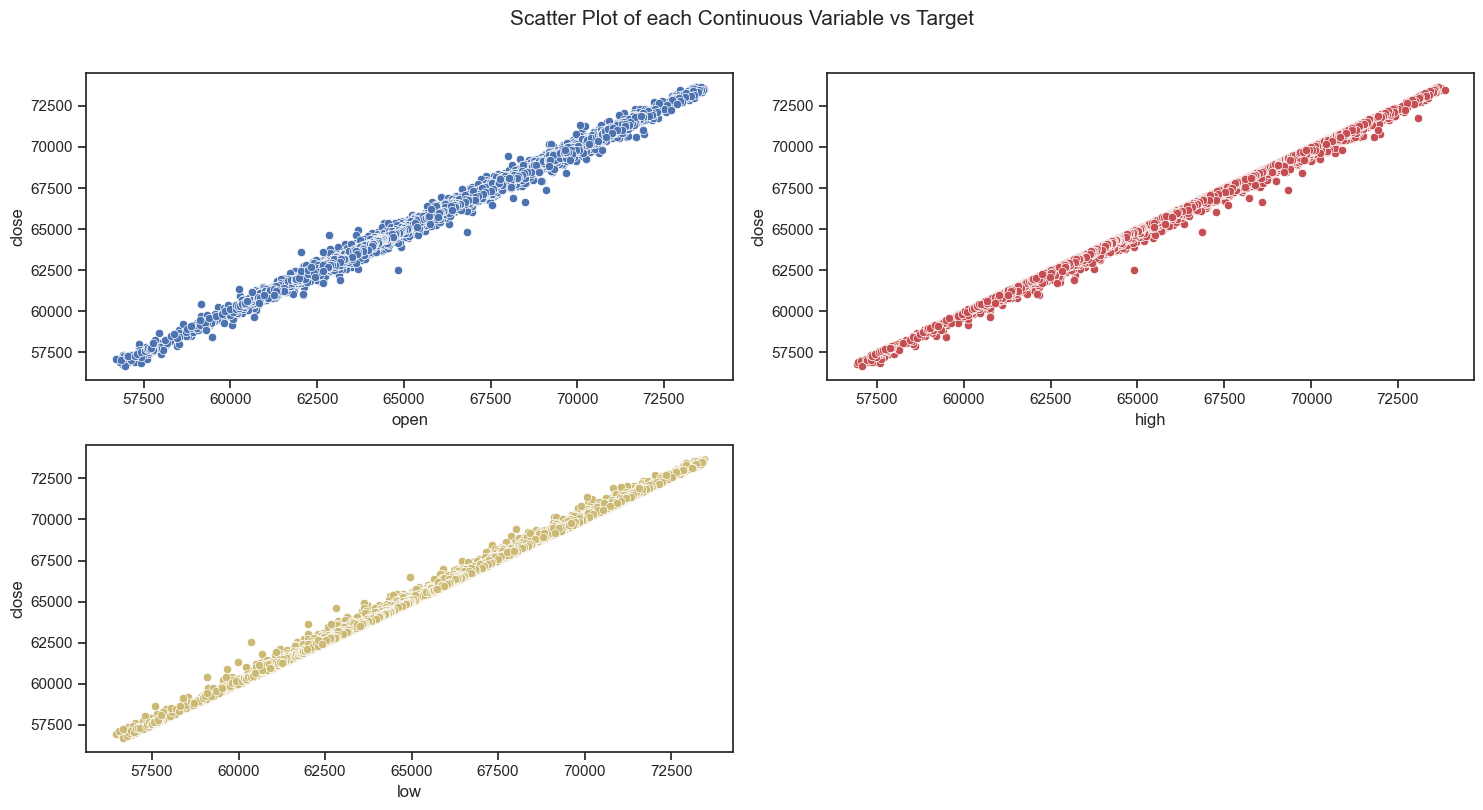

Number of All Scatter Plots = 6


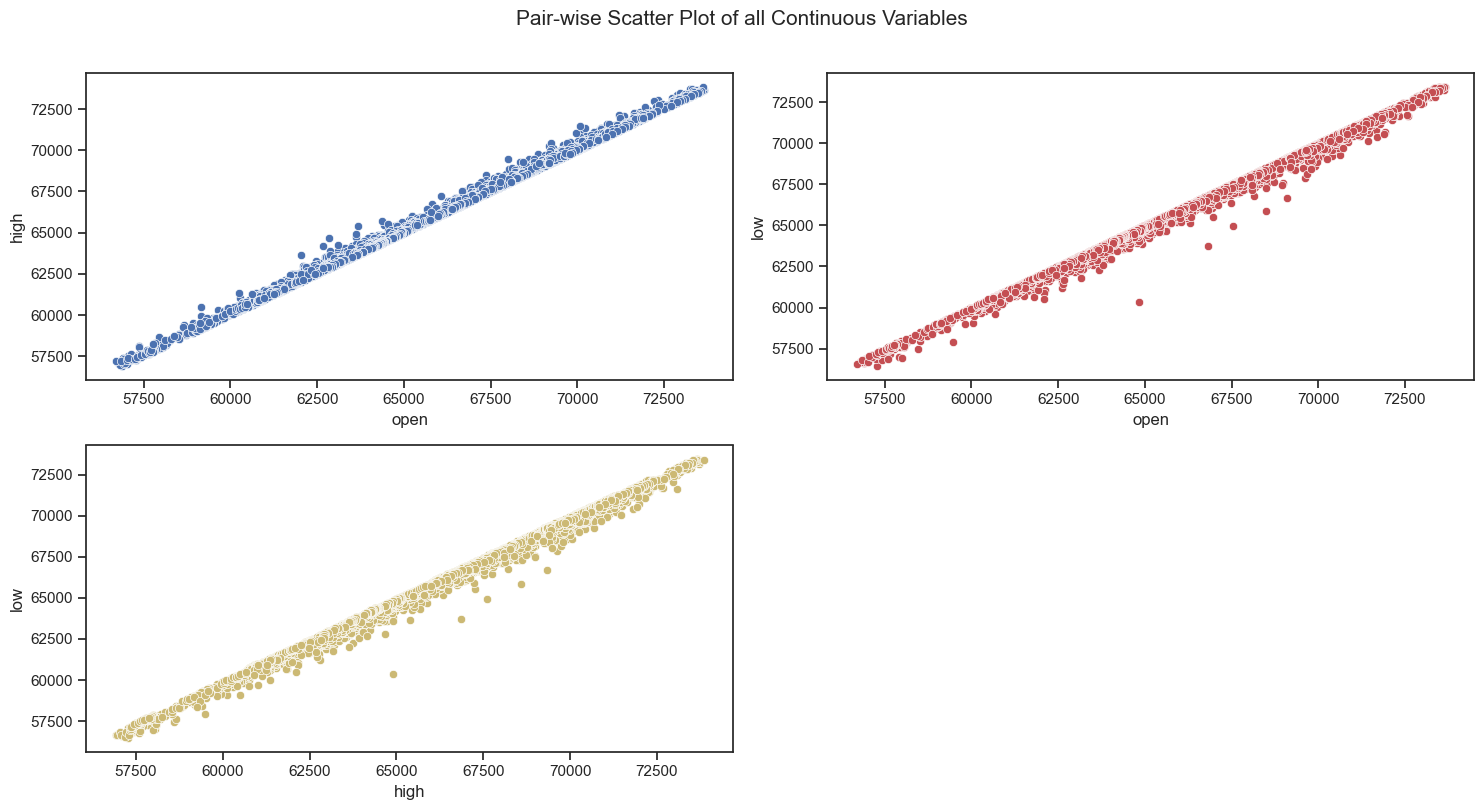

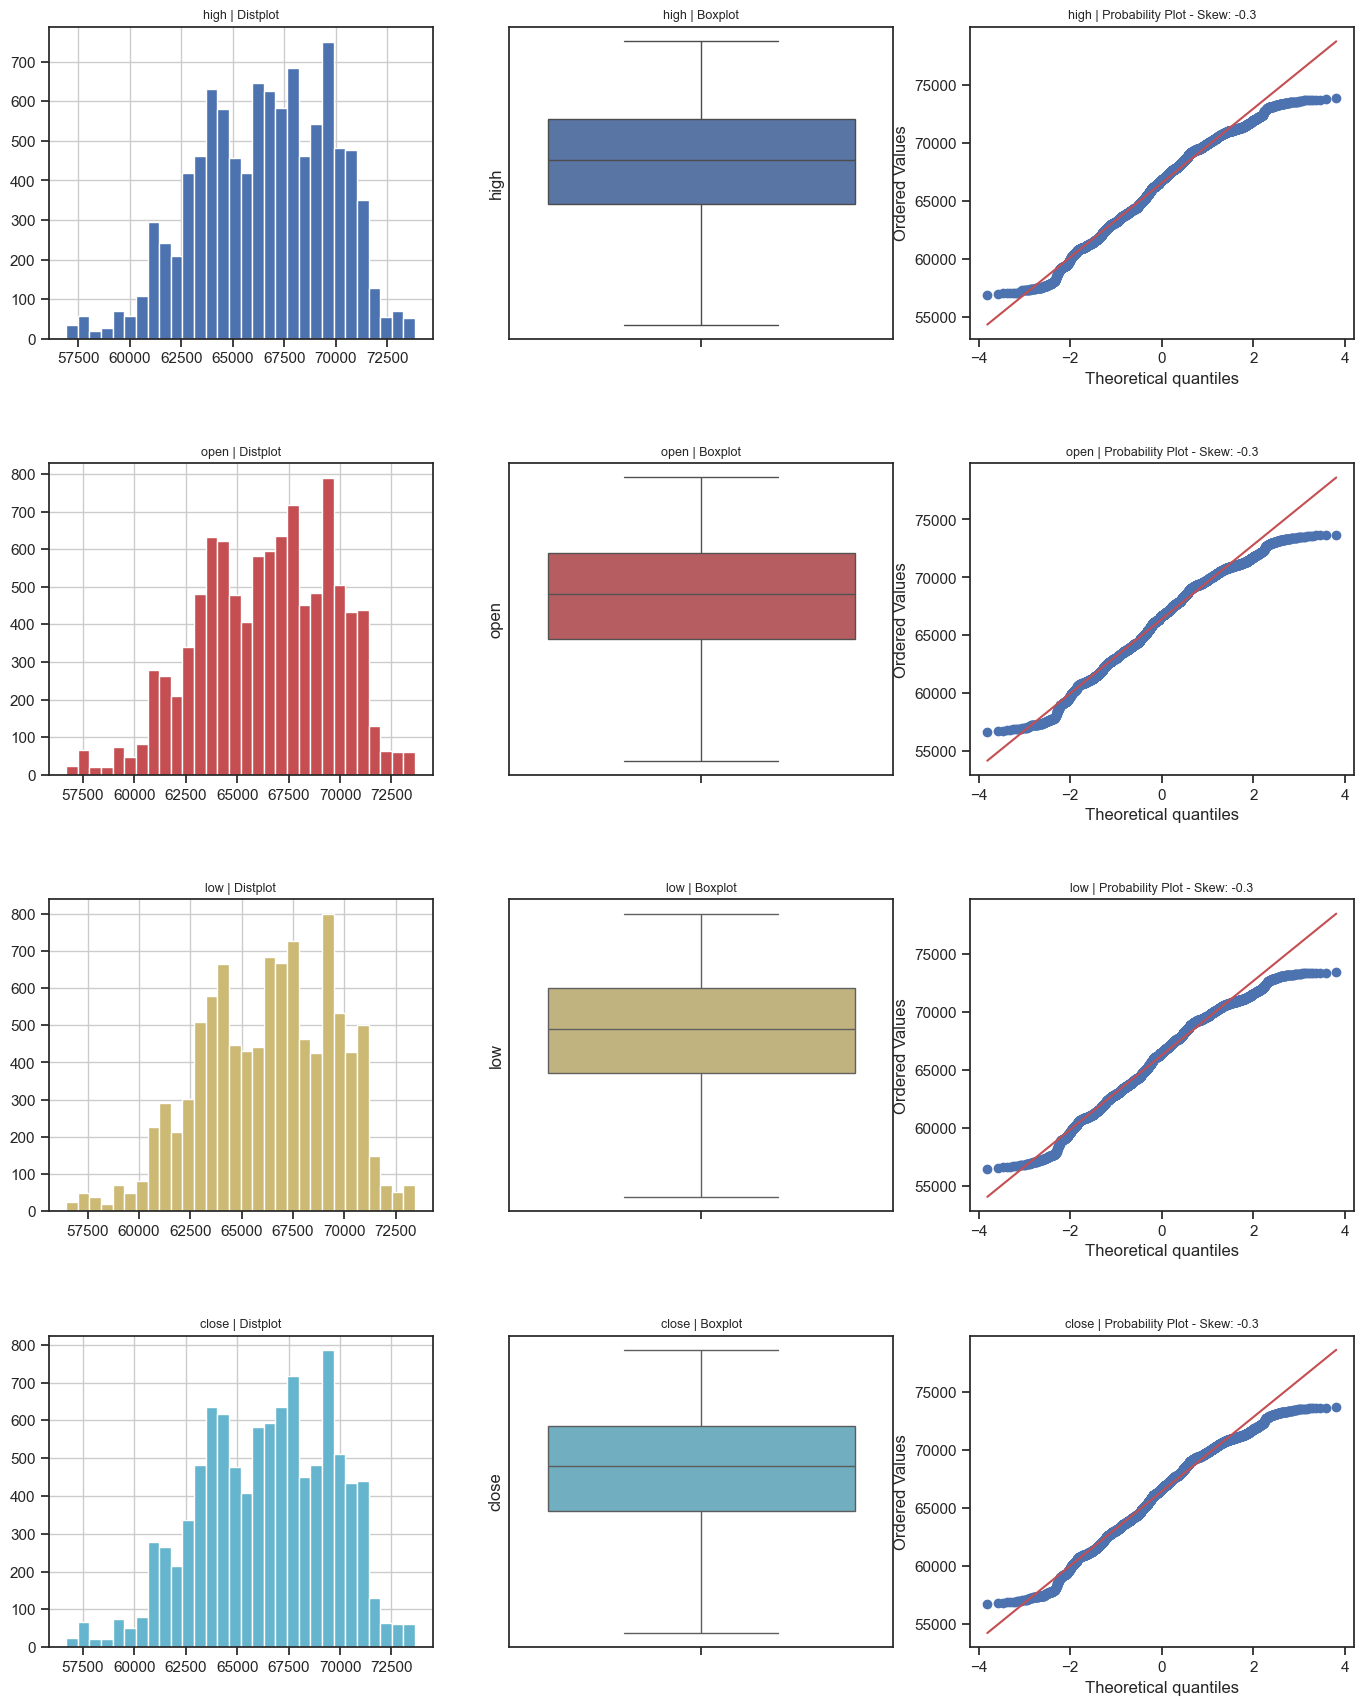

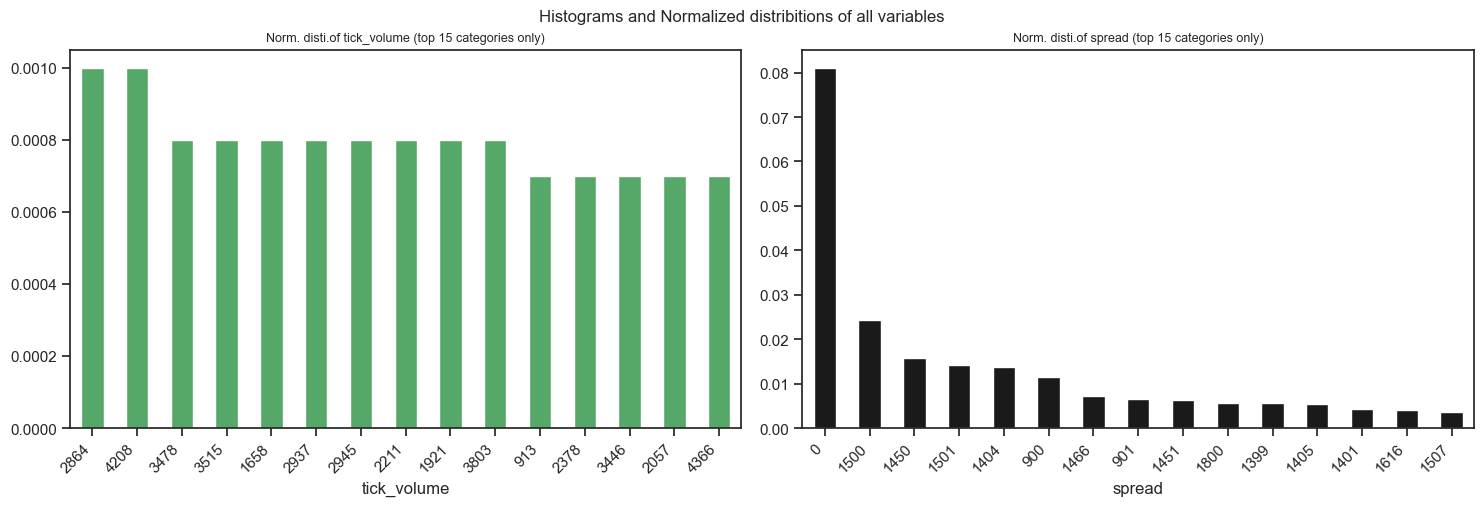

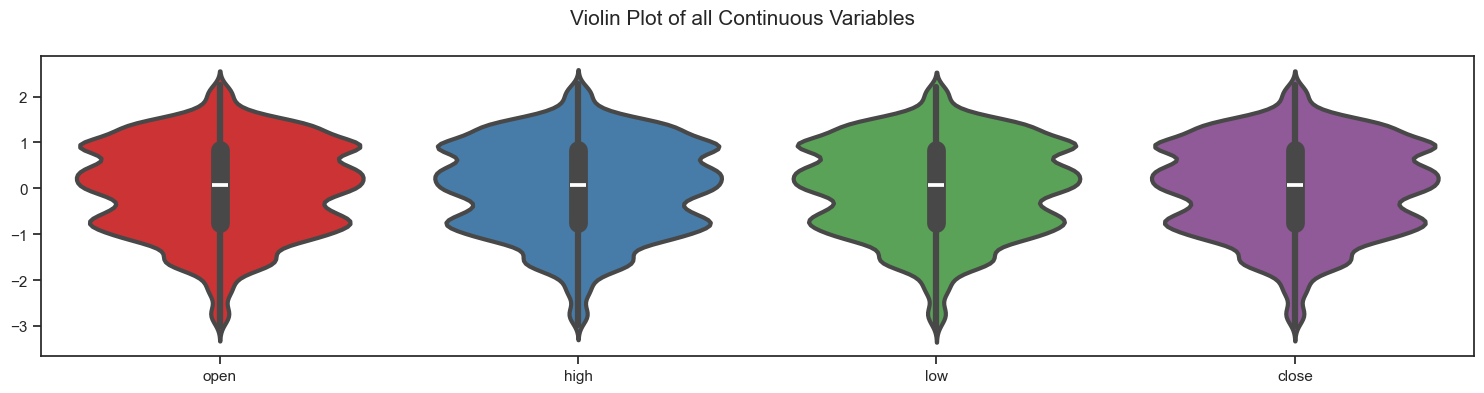

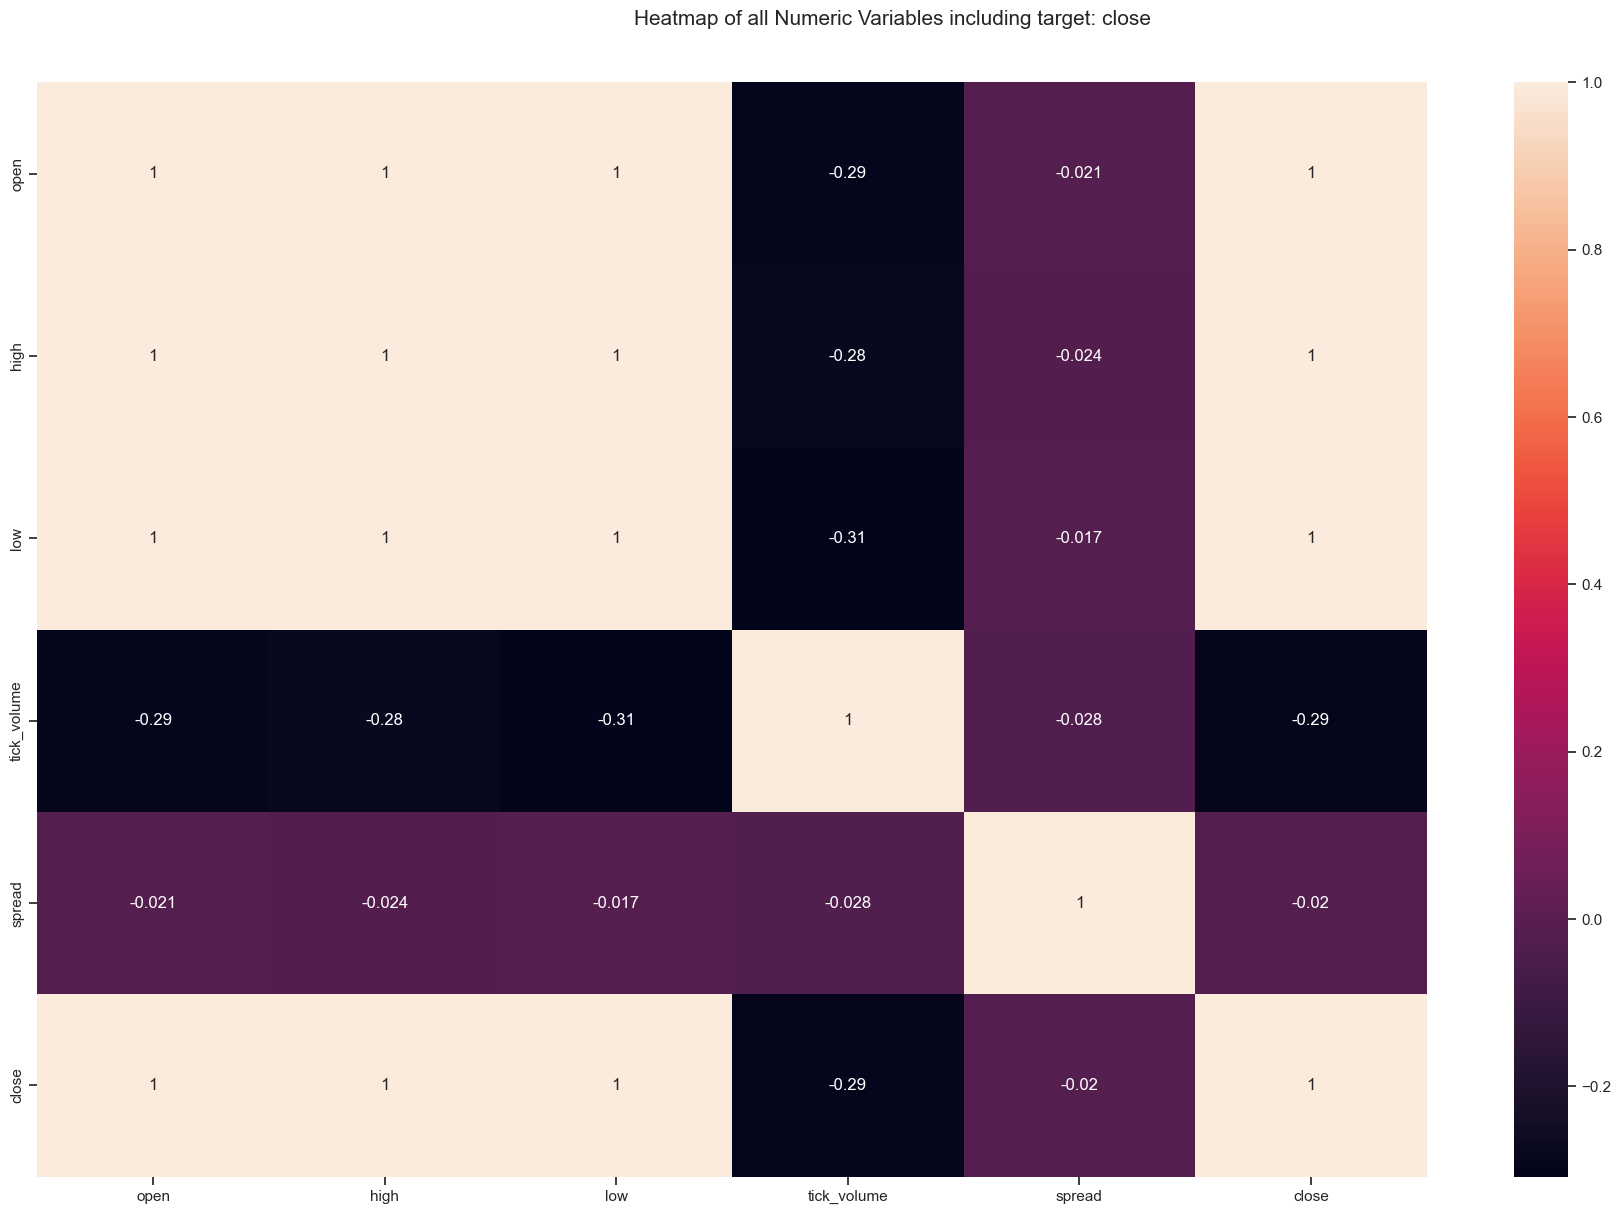

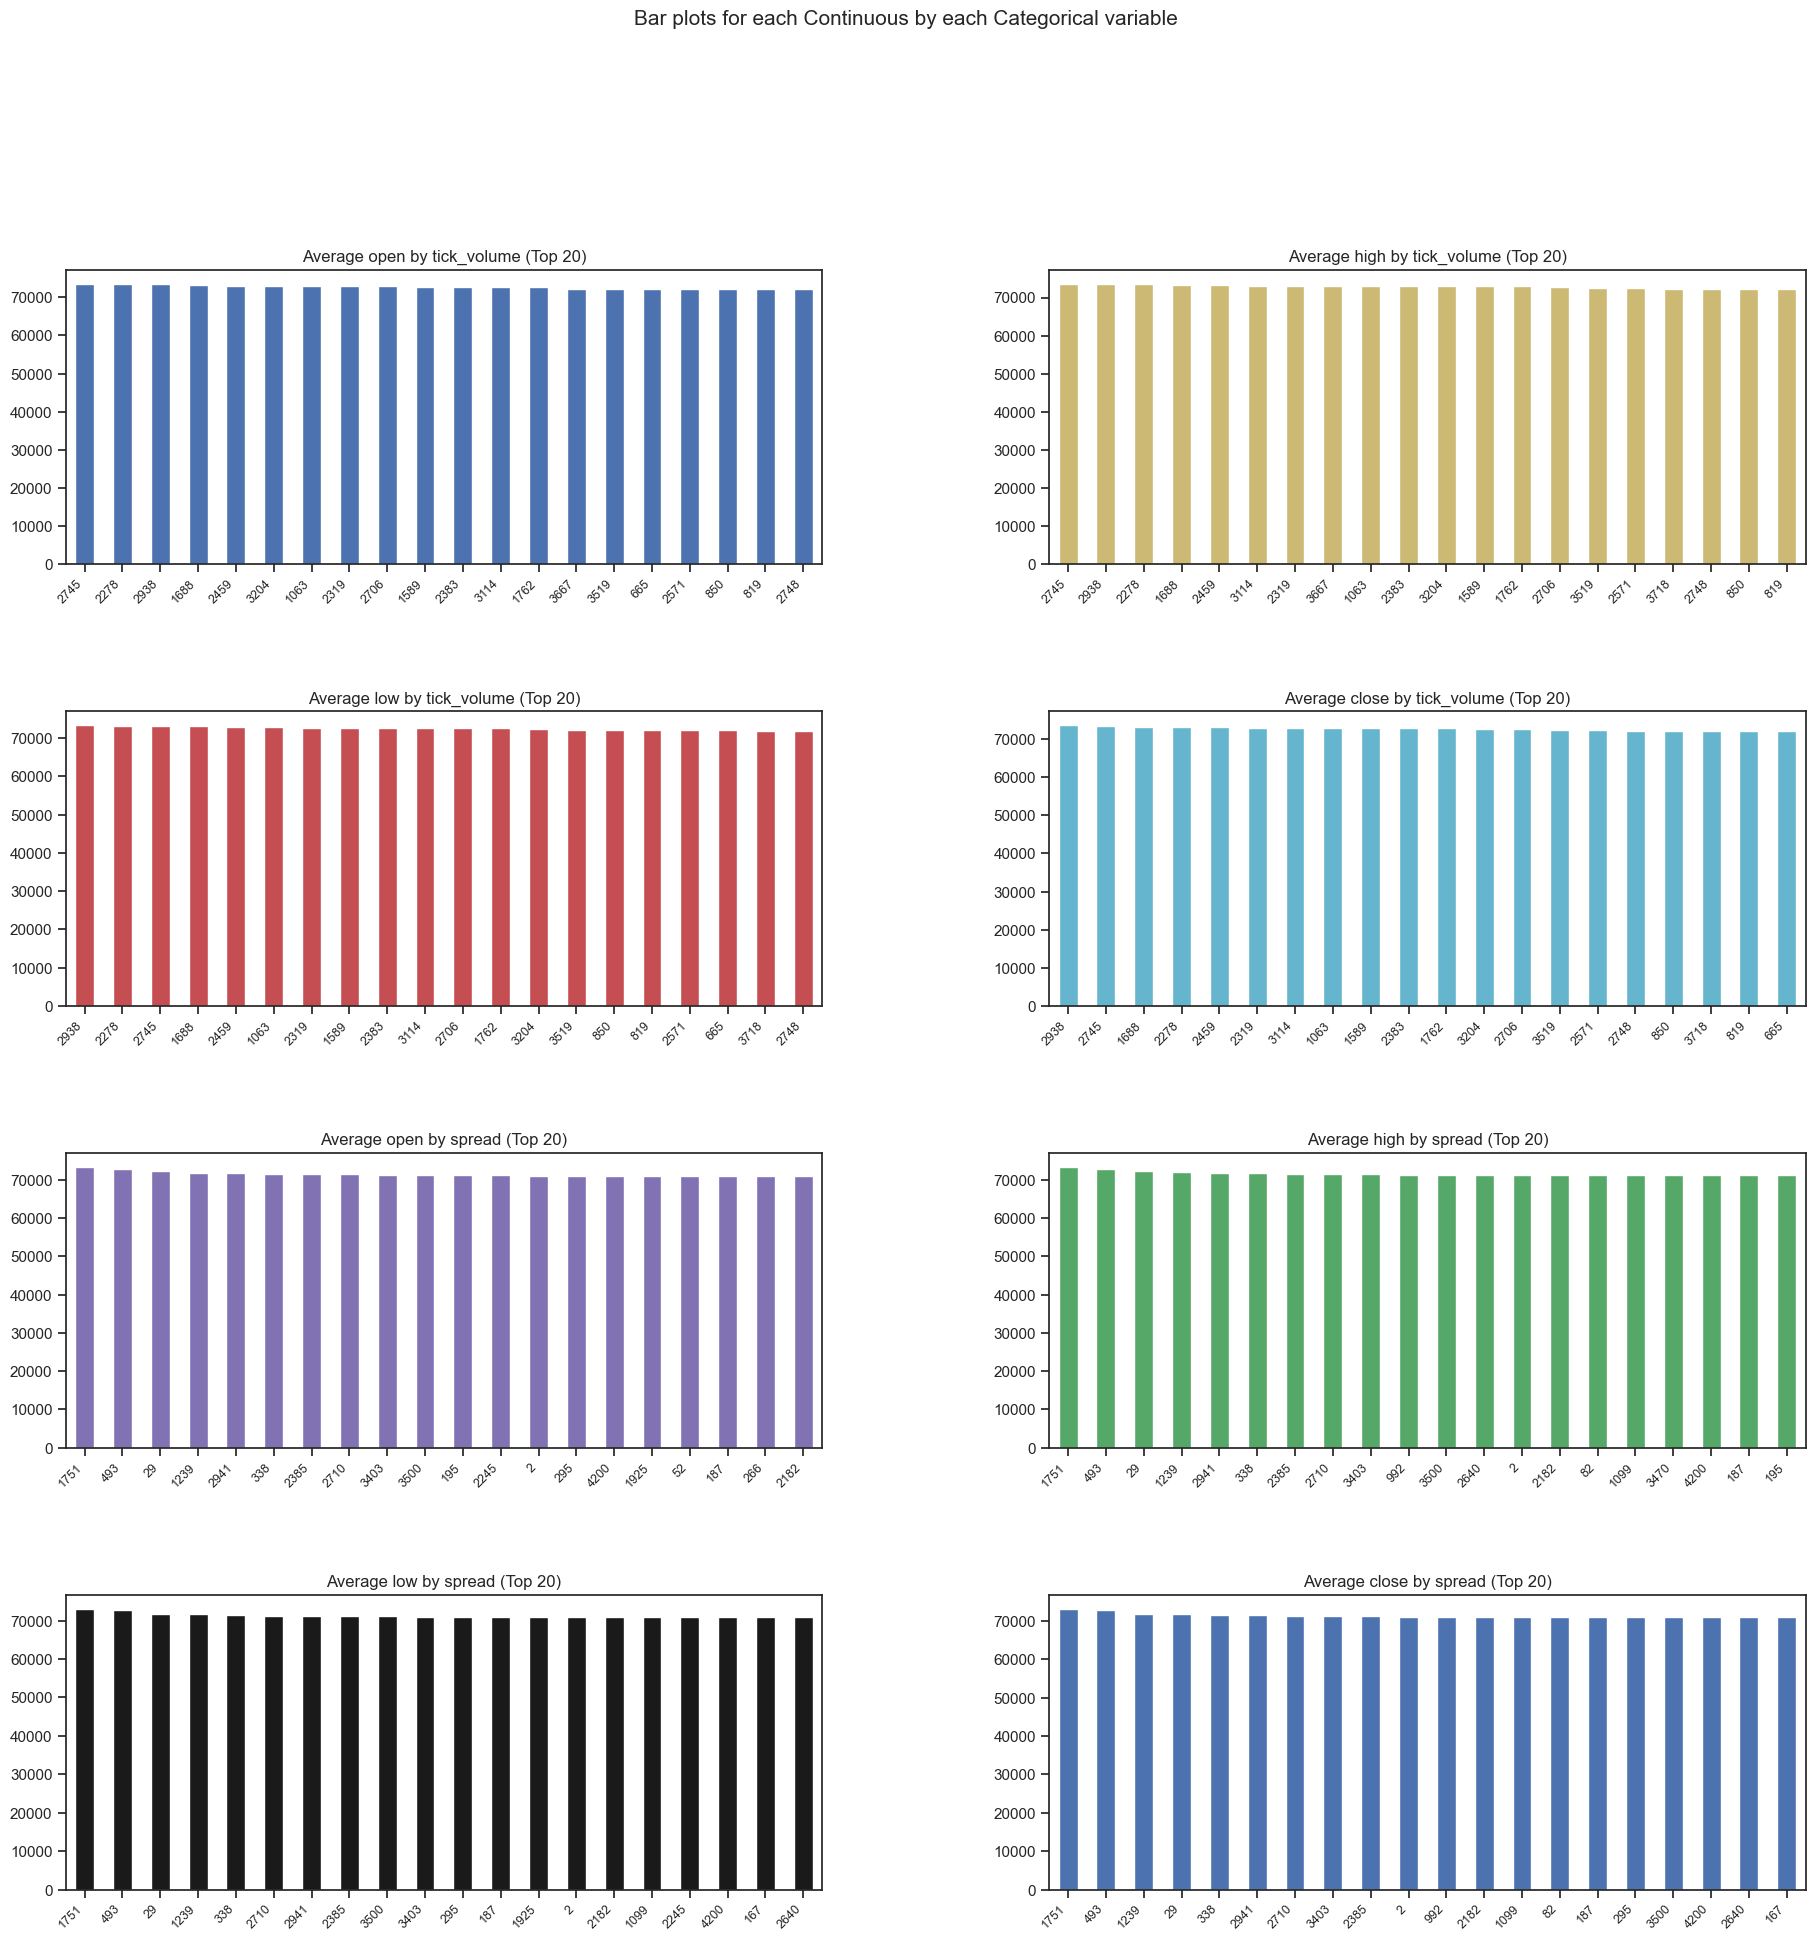

All Plots done
Time to run AutoViz = 13 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [6]:
dft = AV.AutoViz(
    'data_15.csv',
    sep=",",
    depVar="close",
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="jpg",
    save_plot_dir=None
)

Shape of your Data Set loaded: (10000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    7 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['time', 'real_volume']

################ Regression problem ########

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
open,float64,0.000000,NA,37183.620000,73636.900000,No issue
high,float64,0.000000,NA,37262.040000,73843.750000,Column has a high correlation with ['open']. Consider dropping one of them.
low,float64,0.000000,NA,37139.090000,73406.670000,"Column has a high correlation with ['open', 'high']. Consider dropping one of them."
tick_volume,int64,0.000000,57,12.000000,13149.000000,Column has 35 outliers greater than upper bound (10648.12) or lower than lower bound(-2164.88). Cap them or remove them.
spread,int64,0.000000,16,0.000000,11049.000000,Column has 135 outliers greater than upper bound (1784.38) or lower than lower bound(-176.62). Cap them or remove them.
close,float64,0.000000,99,37211.620000,73639.900000,Target column


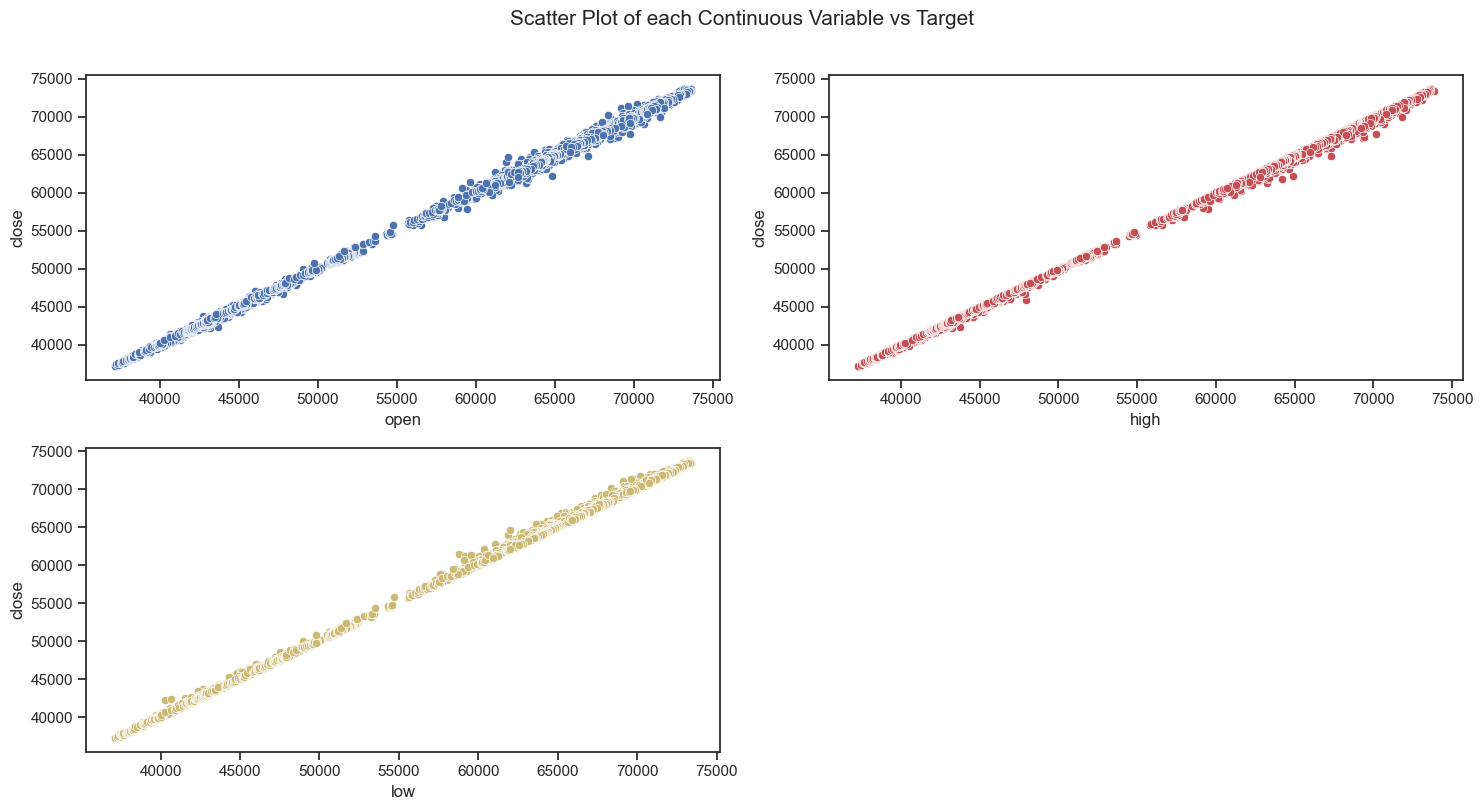

Number of All Scatter Plots = 6


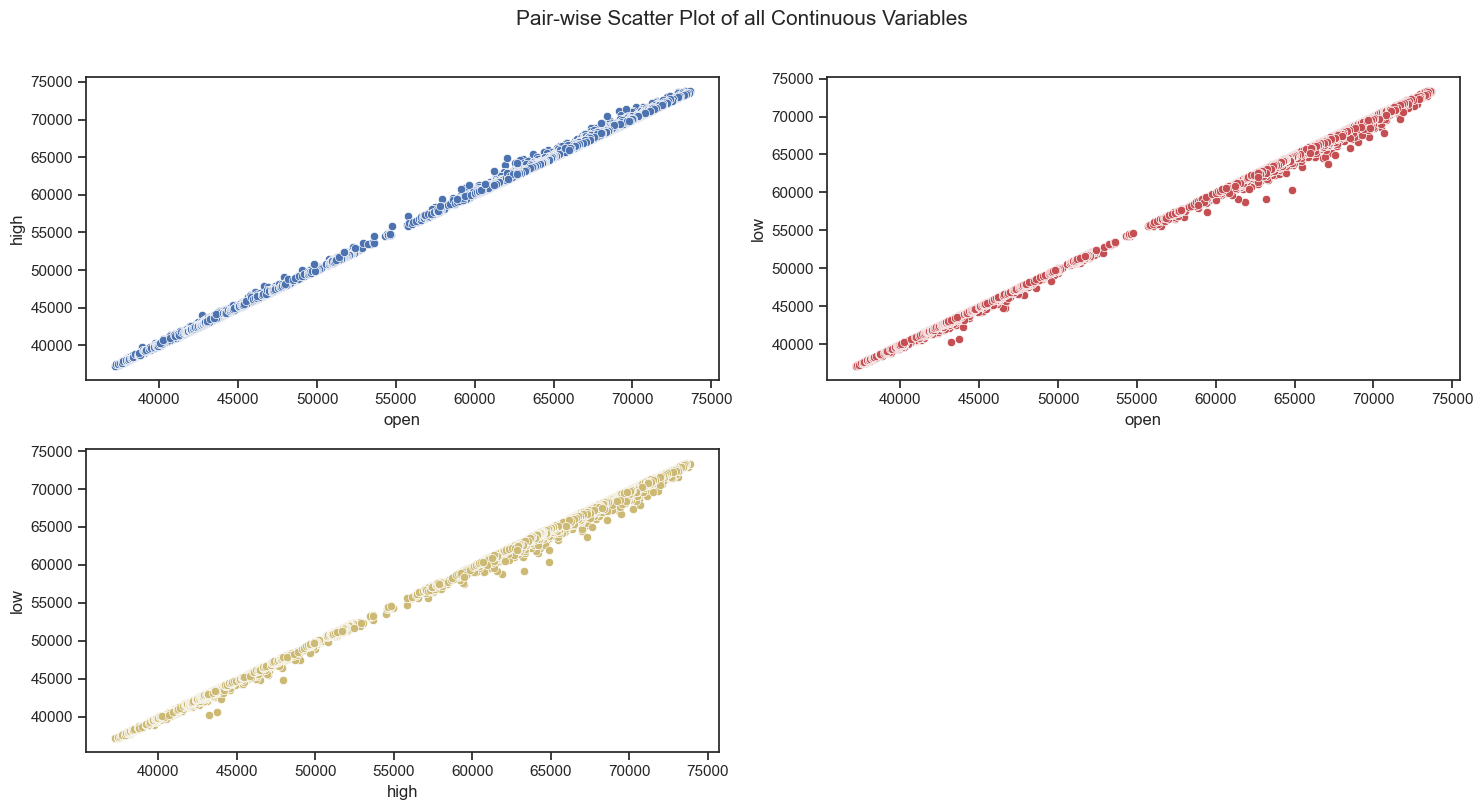

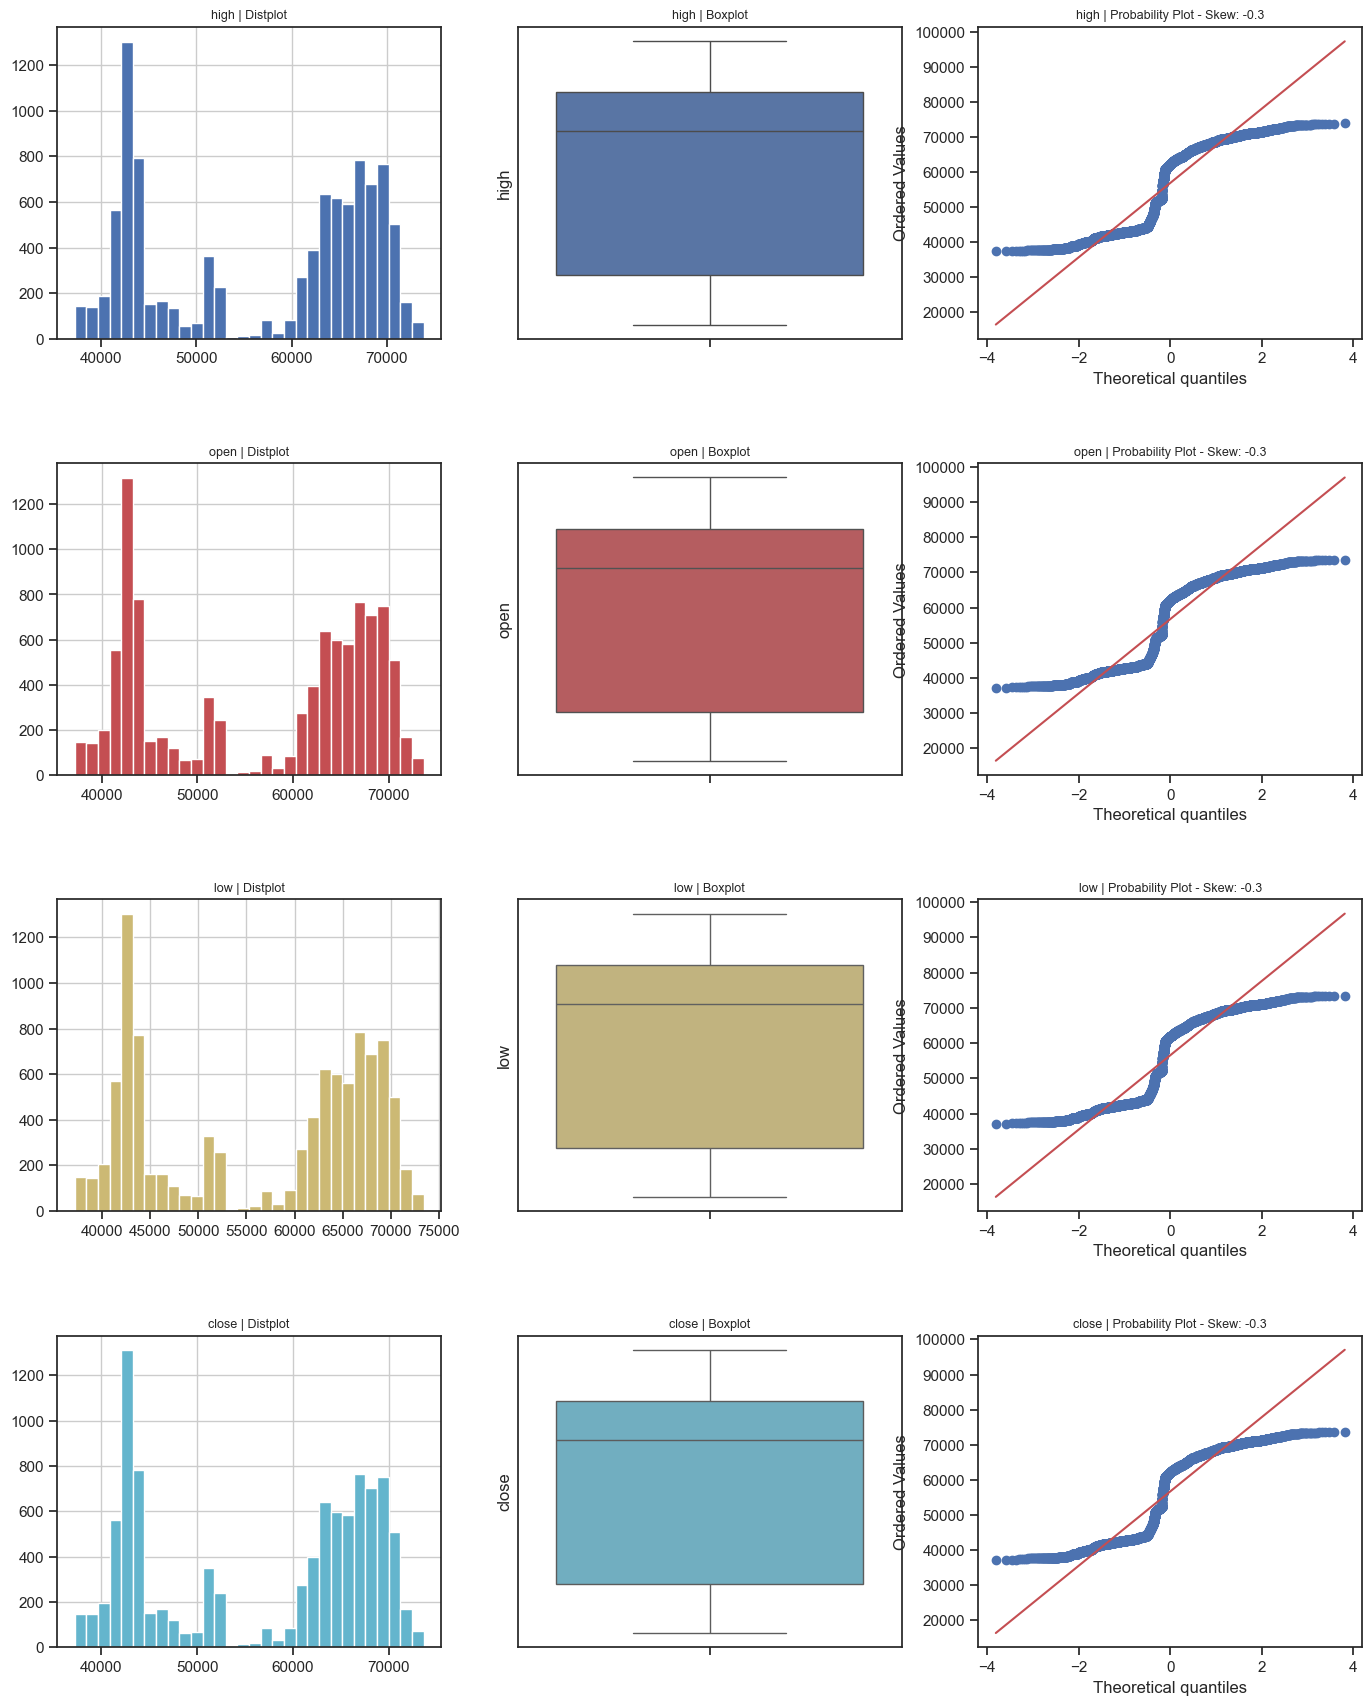

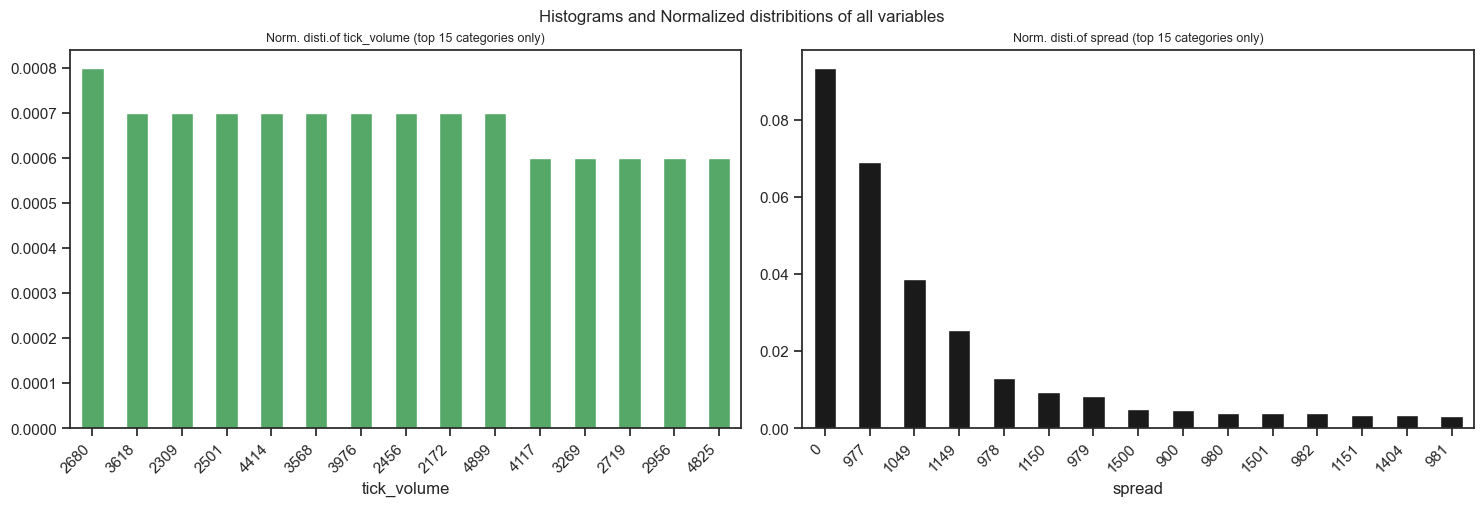

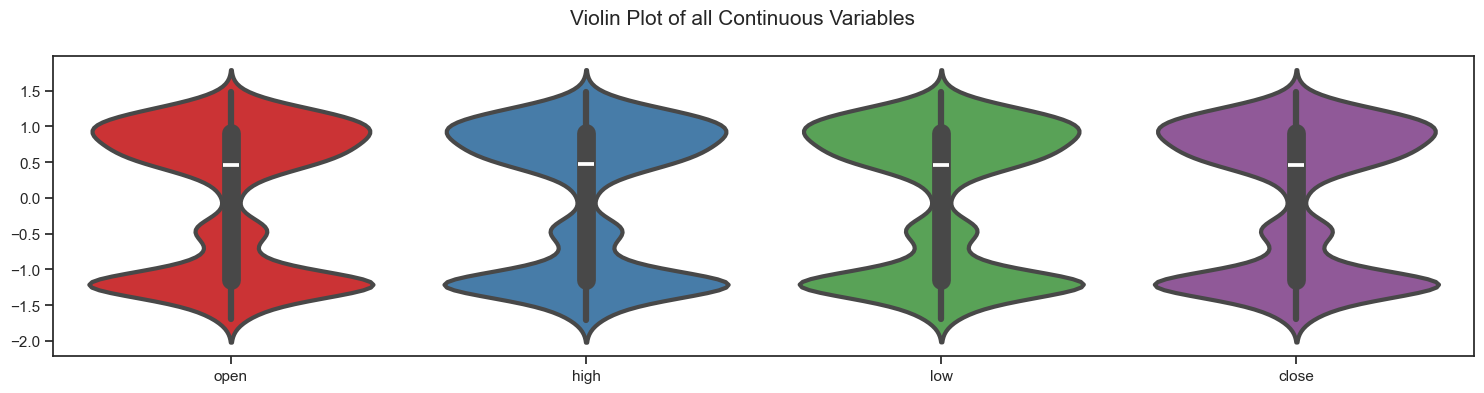

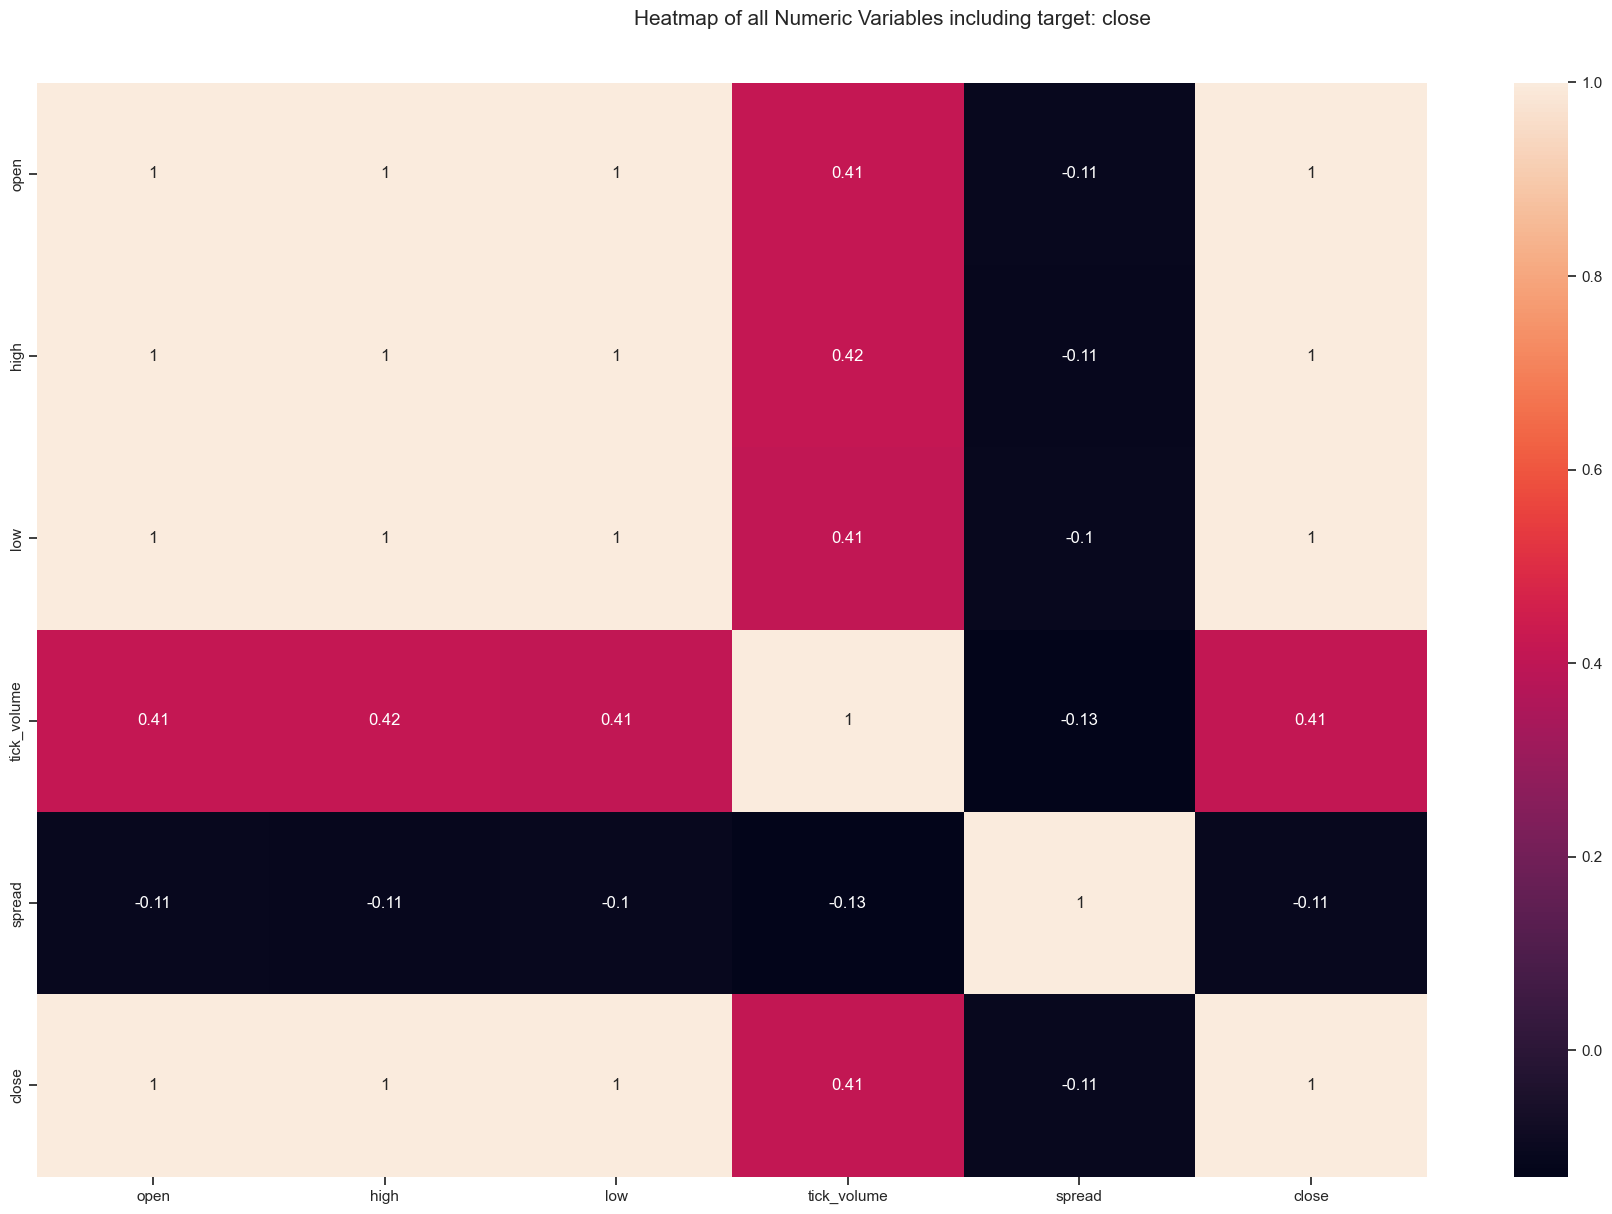

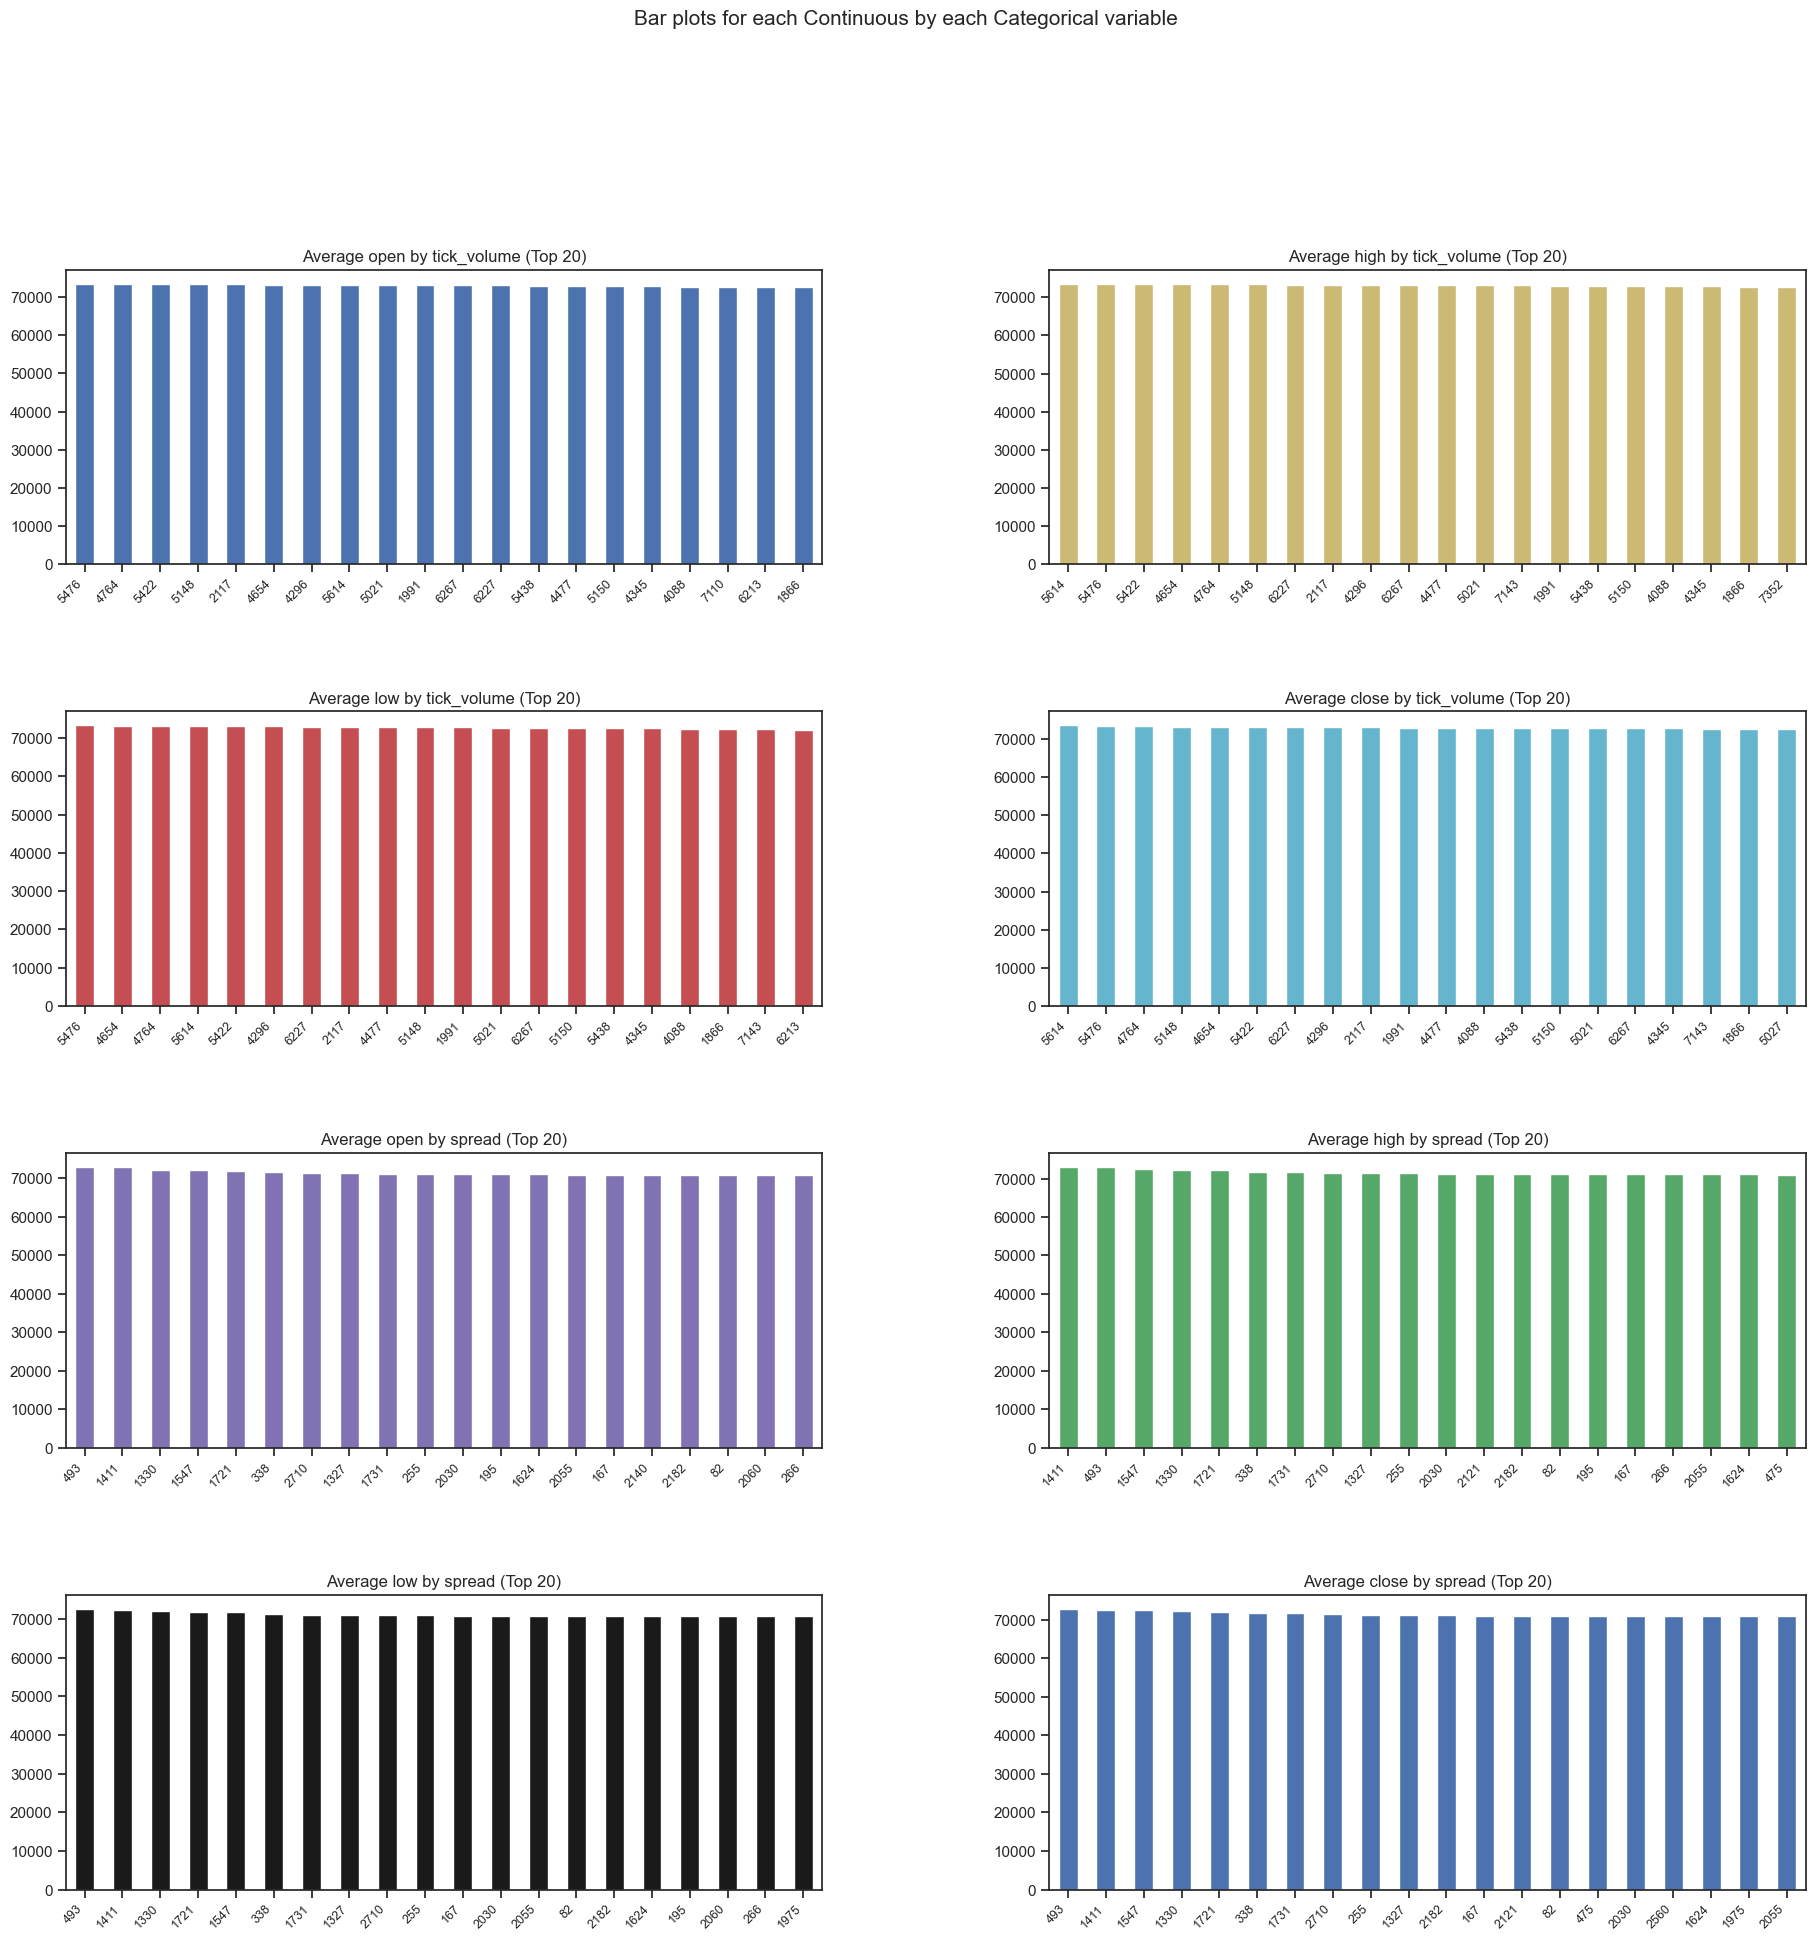

All Plots done
Time to run AutoViz = 11 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [7]:
dft = AV.AutoViz(
    'data_30.csv',
    sep=",",
    depVar="close",
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="jpg",
    save_plot_dir=None
)

as we can see the data in time interval of **15 minutes** are more normally distributed also don't have outliers along with wider stable density of data. so the data is getting more stable meaning in the 15 minutes timeframe interval. **Hence, we'll use 15 minutes timeframe to create LSTM model**.

### Getting Selected Timeframe Data

In [3]:
data = pd.read_csv('data_15.csv')
data

,time,open,high,low,close,tick_volume,spread,real_volume
0,2024-03-12 08:45:00,71912.12,72039.96,71806.11,71979.99,1360,802,0
1,2024-03-12 09:00:00,71981.85,71993.35,71734.23,71771.80,1809,687,0
2,2024-03-12 09:15:00,71771.80,71816.82,71505.16,71515.89,2211,964,0
3,2024-03-12 09:30:00,71515.89,71711.47,71426.11,71677.12,2529,834,0
4,2024-03-12 09:45:00,71677.12,72287.91,71673.29,72276.52,2895,0,0
...,...,...,...,...,...,...,...,...
9995,2024-06-25 07:45:00,61249.55,61366.13,61196.91,61331.42,1894,1296,0
9996,2024-06-25 08:00:00,61331.42,61377.65,61281.27,61322.11,1478,831,0
9997,2024-06-25 08:15:00,61324.86,61349.40,61242.48,61243.30,1724,591,0
9998,2024-06-25 08:30:00,61245.30,61279.20,60943.66,60969.89,2429,835,0


### Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         10000 non-null  object 
 1   open         10000 non-null  float64
 2   high         10000 non-null  float64
 3   low          10000 non-null  float64
 4   close        10000 non-null  float64
 5   tick_volume  10000 non-null  int64  
 6   spread       10000 non-null  int64  
 7   real_volume  10000 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 625.1+ KB


In [5]:
# Converting from object to datetime
data['time'] = pd.to_datetime(data['time'])
print(data['time'].dtype)
data

datetime64[ns]


,time,open,high,low,close,tick_volume,spread,real_volume
0,2024-03-12 08:45:00,71912.12,72039.96,71806.11,71979.99,1360,802,0
1,2024-03-12 09:00:00,71981.85,71993.35,71734.23,71771.80,1809,687,0
2,2024-03-12 09:15:00,71771.80,71816.82,71505.16,71515.89,2211,964,0
3,2024-03-12 09:30:00,71515.89,71711.47,71426.11,71677.12,2529,834,0
4,2024-03-12 09:45:00,71677.12,72287.91,71673.29,72276.52,2895,0,0
...,...,...,...,...,...,...,...,...
9995,2024-06-25 07:45:00,61249.55,61366.13,61196.91,61331.42,1894,1296,0
9996,2024-06-25 08:00:00,61331.42,61377.65,61281.27,61322.11,1478,831,0
9997,2024-06-25 08:15:00,61324.86,61349.40,61242.48,61243.30,1724,591,0
9998,2024-06-25 08:30:00,61245.30,61279.20,60943.66,60969.89,2429,835,0


In [6]:
# checking null values
data.isnull().sum()

time           0
open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
dtype: int64

In [7]:
# checking duplicate values
data.duplicated().sum()

0

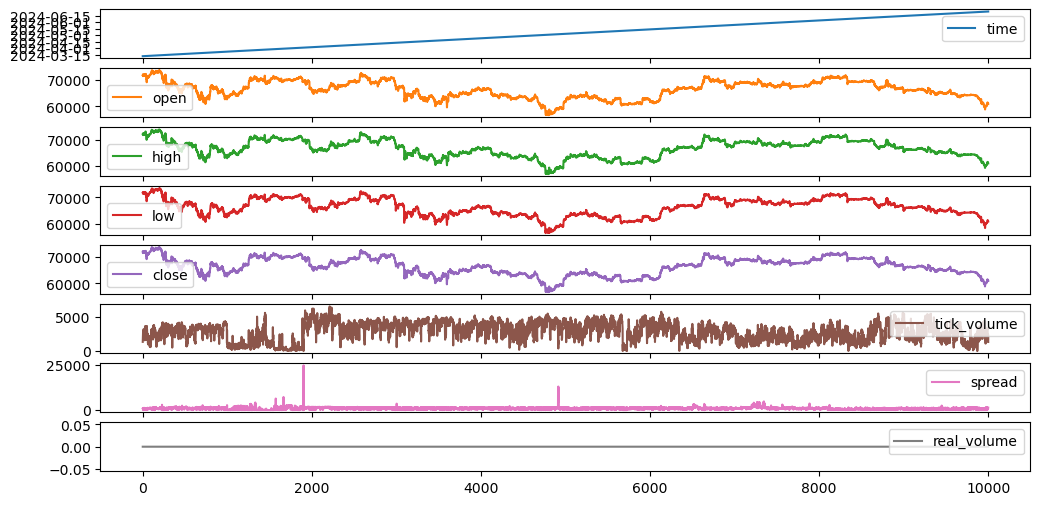

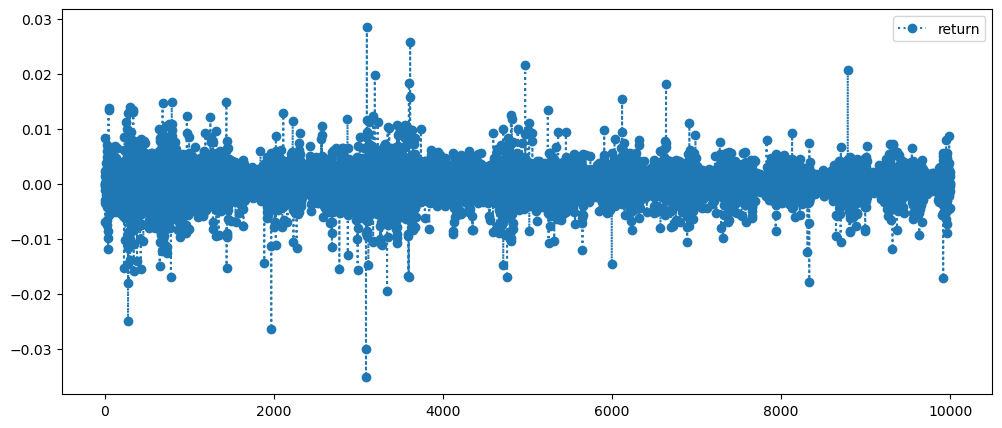

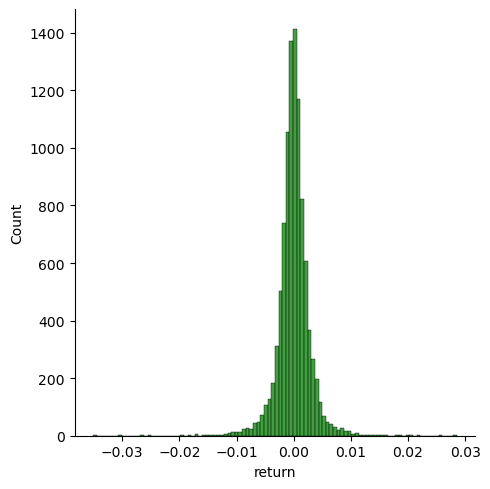

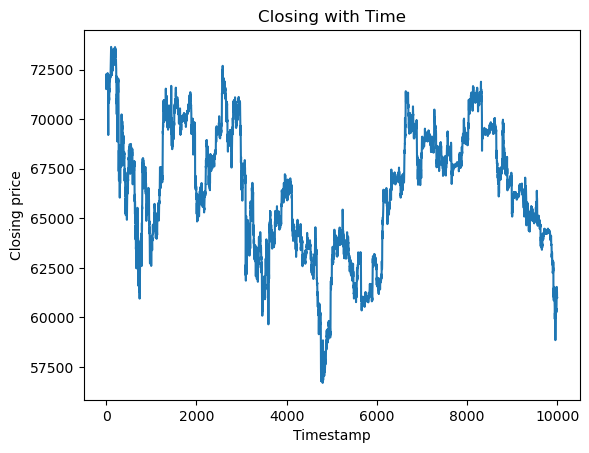

In [8]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()


data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


data['return'] = data['close'].pct_change()
# plot the daily return percentage
data['return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['return'].dropna(),bins=100,color='green')
plt.show()

plt.plot(data['close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
plt.title('Closing with Time')
plt.show()

In [9]:
data['log_return'] = np.log(1 + data['return'])
data

,time,open,high,low,close,tick_volume,spread,real_volume,return,log_return
0,2024-03-12 08:45:00,71912.12,72039.96,71806.11,71979.99,1360,802,0,NaN,NaN
1,2024-03-12 09:00:00,71981.85,71993.35,71734.23,71771.80,1809,687,0,-0.002892,-0.002897
2,2024-03-12 09:15:00,71771.80,71816.82,71505.16,71515.89,2211,964,0,-0.003566,-0.003572
3,2024-03-12 09:30:00,71515.89,71711.47,71426.11,71677.12,2529,834,0,0.002254,0.002252
4,2024-03-12 09:45:00,71677.12,72287.91,71673.29,72276.52,2895,0,0,0.008363,0.008328
...,...,...,...,...,...,...,...,...,...,...
9995,2024-06-25 07:45:00,61249.55,61366.13,61196.91,61331.42,1894,1296,0,0.001348,0.001347
9996,2024-06-25 08:00:00,61331.42,61377.65,61281.27,61322.11,1478,831,0,-0.000152,-0.000152
9997,2024-06-25 08:15:00,61324.86,61349.40,61242.48,61243.30,1724,591,0,-0.001285,-0.001286
9998,2024-06-25 08:30:00,61245.30,61279.20,60943.66,60969.89,2429,835,0,-0.004464,-0.004474


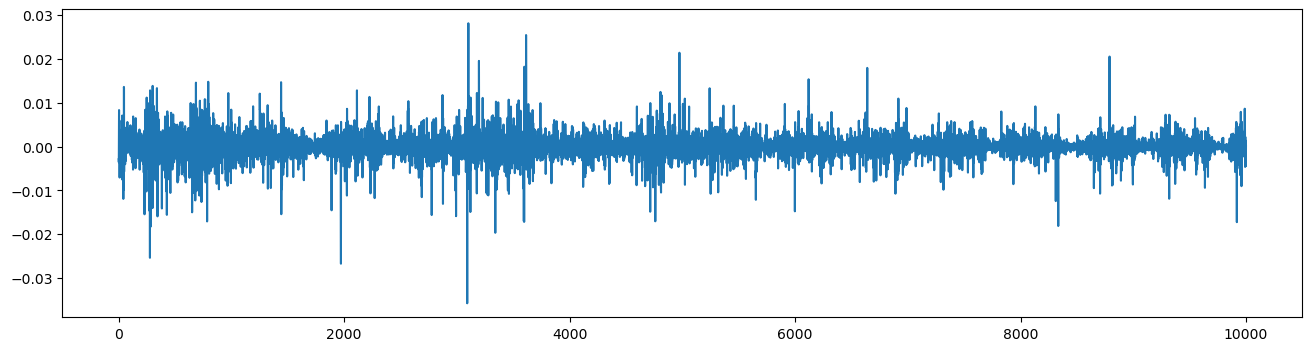

In [10]:
plt.figure(1, figsize=(16, 4))
plt.plot(data['log_return'])

In [11]:
data.dropna(inplace=True)
X = data[['close', 'log_return']].values
X

array([[ 7.17718000e+04, -2.89652248e-03],
       [ 7.15158900e+04, -3.57197847e-03],
       [ 7.16771200e+04,  2.25192652e-03],
       ...,
       [ 6.12433000e+04, -1.28600738e-03],
       [ 6.09698900e+04, -4.47431993e-03],
       [ 6.09773200e+04,  1.21856007e-04]])

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = scaler.transform(X)

In [13]:
y_scaled = [x[0] for x in X_scaled]


In [14]:
X_scaled[:7], y_scaled[:7]

(array([[0.88944809, 0.51438698],
        [0.87435616, 0.50381691],
        [0.88386447, 0.59495397],
        [0.91921324, 0.69003292],
        [0.91403536, 0.54069267],
        [0.91215587, 0.55280387],
        [0.91158324, 0.55760808]]),
 [0.8894480896681798,
  0.8743561557233295,
  0.8838644692317037,
  0.9192132449987445,
  0.9140353629294311,
  0.9121558743013112,
  0.9115832406464928])

### Train Test Split

In [15]:
split = int(len(X_scaled) * 0.85)
print(split)

8499


In [16]:
X_train = X_scaled[:split]
X_test = X_scaled[split: len(X_scaled)]
y_train = y_scaled[:split]
y_test = y_scaled[split: len(y_scaled)]

In [17]:
assert len (X_train) == len(y_train)
assert len (X_test) == len(y_test)

In [18]:
# set the timestep for training
timestep = 5
X_train_new = []
y_train_new = []
X_test_new = []
y_test_new = []

for step in range(timestep, len(X_train)):
    X_train_new.append(X_train[step - timestep : step, : X_train.shape[1]])
    y_train_new.append(y_train[step]) # predict next record

for step in range(timestep, len(X_test)):
    X_test_new.append(X_test[step - timestep : step, : X_test.shape[1]])
    y_test_new.append(y_test[step]) # predict next record

In [19]:
X_train_new[0]

array([[0.88944809, 0.51438698],
       [0.87435616, 0.50381691],
       [0.88386447, 0.59495397],
       [0.91921324, 0.69003292],
       [0.91403536, 0.54069267]])

In [20]:
y_train_new[0]

0.9121558743013112

In [21]:
X_train_new, y_train_new = (np.array(X_train_new), np.array(y_train_new))
X_train_new = np.reshape(X_train_new, (X_train_new.shape[0], X_train_new.shape[1], X_train_new.shape[2]))

X_test_new, y_test_new = (np.array(X_test_new), np.array(y_test_new))
X_test_new = np.reshape(X_test_new, (X_test_new.shape[0], X_test_new.shape[1], X_test_new.shape[2]))

In [22]:
X_train_new.shape, y_train_new.shape,X_test_new.shape, y_test_new.shape

((8494, 5, 2), (8494,), (1495, 5, 2), (1495,))

## LSTM Model

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [34]:
model = Sequential()
model.add(LSTM(50, input_shape = (X_train_new.shape[1], X_train_new.shape[2]), activation= 'relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(60, activation= 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

g:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.compile(loss = 'mse', optimizer= 'adam', metrics=['mse', 'mae'])
history = model.fit(X_train_new, y_train_new, epochs = 100, validation_data=(X_test_new, y_test_new), batch_size=32, verbose=1, shuffle=True)

Epoch 1/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 0.0852 - mae: 0.2067 - mse: 0.0852 - val_loss: 8.6369e-04 - val_mae: 0.0242 - val_mse: 8.6369e-04
Epoch 2/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0080 - mae: 0.0690 - mse: 0.0080 - val_loss: 6.6014e-04 - val_mae: 0.0211 - val_mse: 6.6014e-04
Epoch 3/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0072 - mae: 0.0656 - mse: 0.0072 - val_loss: 7.6337e-04 - val_mae: 0.0212 - val_mse: 7.6337e-04
Epoch 4/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0062 - mae: 0.0601 - mse: 0.0062 - val_loss: 3.2351e-04 - val_mae: 0.0124 - val_mse: 3.2351e-04
Epoch 5/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0052 - mae: 0.0550 - mse: 0.0052 - val_loss: 5.5174e-04 - val_mae: 0.0198 - val_mse: 5.5174e-04
Epoch 6/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0046 - mae: 0.0516 - mse: 0.0046 - val_loss: 5.0862e-04 - val_mae: 0.0179 - val_mse: 5.0862e-04
Epoch 7/100
266/266 ━━━━━━━━━━━━━━━━━━━

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 5, 50)          │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 5, 60)          │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 60)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 5, 80)          │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5, 80)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,885 (2.05 MB)

 Trainable params: 178,961 (699.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,924 (1.37 MB)

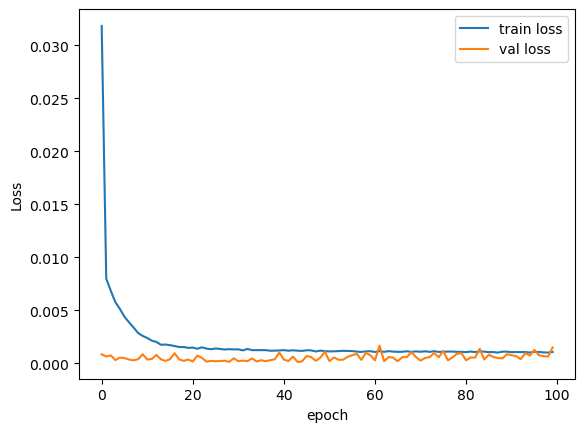

In [39]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label= 'val loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

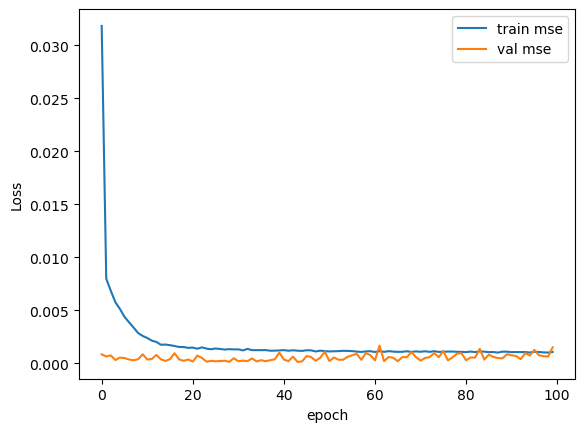

In [40]:
plt.plot(history.history['mse'], label = 'train mse')
plt.plot(history.history['val_mse'], label= 'val mse')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

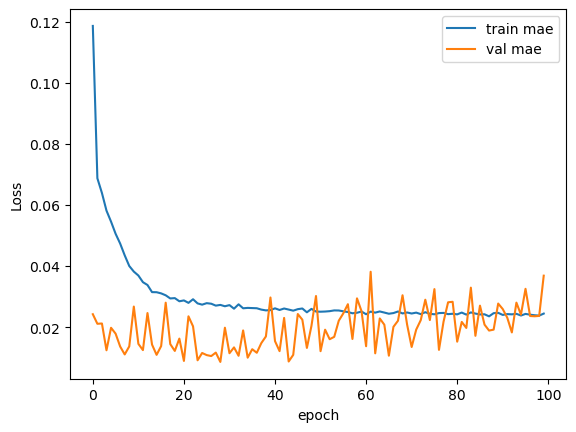

In [41]:
plt.plot(history.history['mae'], label = 'train mae')
plt.plot(history.history['val_mae'], label= 'val mae')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

In [43]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [44]:
model.evaluate(X_test_new, y_test_new)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0419 - mse: 0.0018


[0.0015109976520761847, 0.0015109976520761847, 0.0368666872382164]

In [45]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(X_test_new, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(y_test_new.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(y_test_new.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(y_test_new.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.989162
R2 Score: 0.989162
Max Error: 0.128752


In [46]:
train_predict = model.predict(X_train_new)
test_predict = model.predict(X_test_new)

266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [48]:
test_predict

array([[0.7112086 ],
       [0.7013192 ],
       [0.7074511 ],
       ...,
       [0.25323522],
       [0.25059387],
       [0.2419056 ]], dtype=float32)

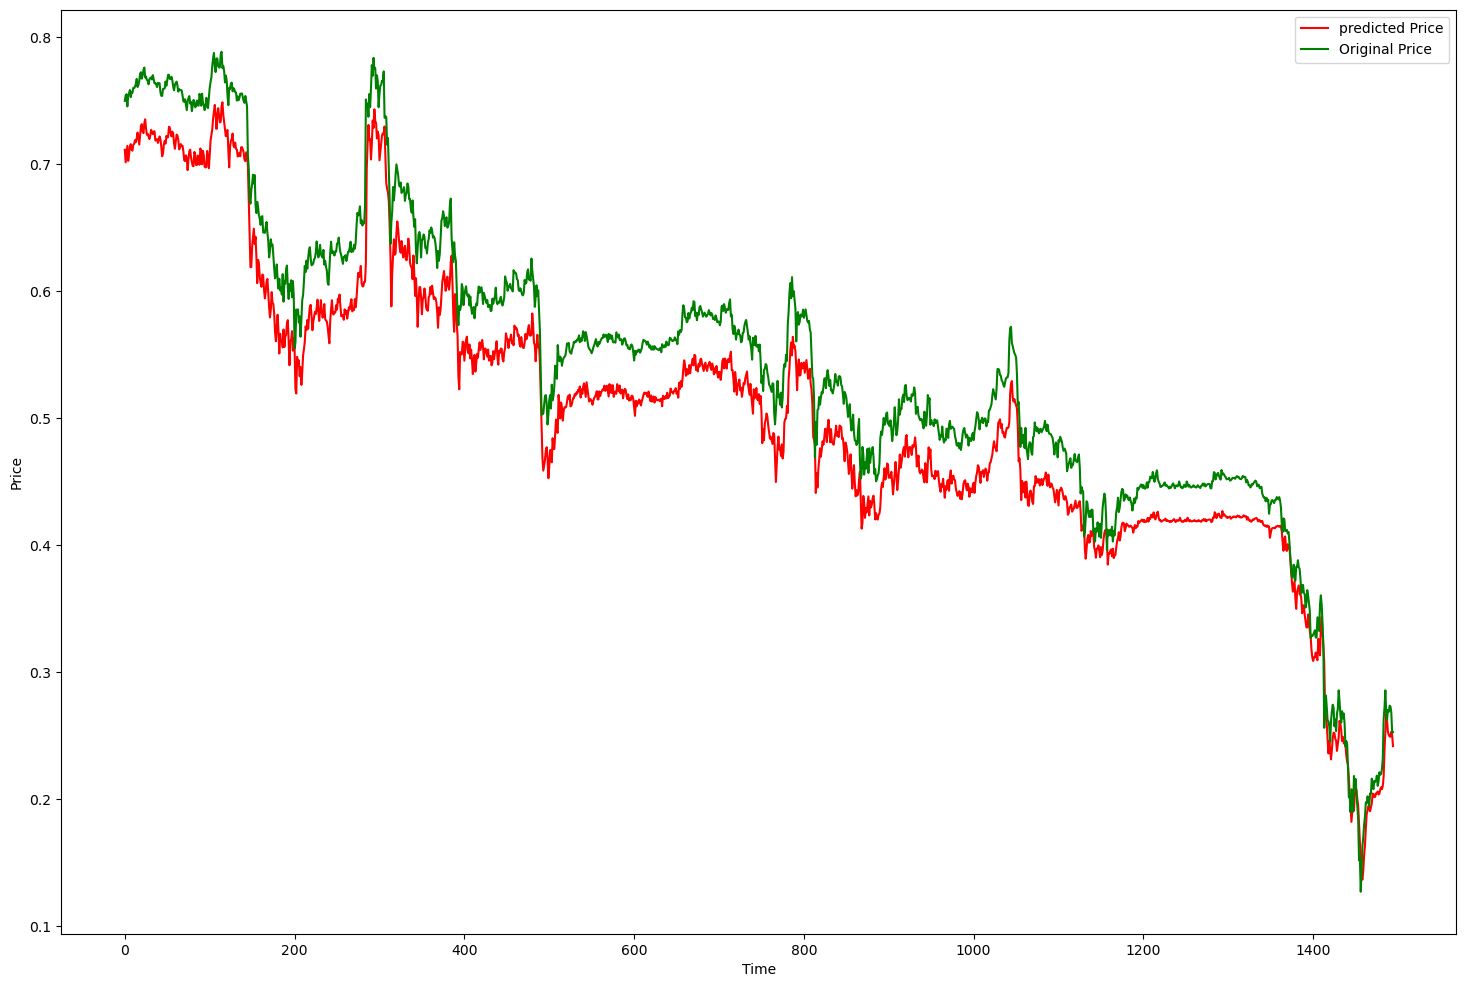

In [51]:
plt.figure(figsize=(18,12))
plt.plot(test_predict, 'r', label = 'predicted Price')
plt.plot(y_test_new, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [52]:
train_predict = np.c_[train_predict, np.zeros(train_predict.shape)]
test_predict = np.c_[test_predict, np.zeros(test_predict.shape)]

In [53]:
train_predict = scaler.inverse_transform(train_predict)
train_predict = [x[0] for x in train_predict]

test_predict = scaler.inverse_transform(test_predict)
test_predict = [x[0] for x in test_predict]


In [55]:
print(train_predict[-10:])
print(test_predict[-10:])

[68598.00171610118, 68626.63486025334, 68622.54051267267, 68578.36178467989, 68547.17864325643, 68544.51949033499, 68535.10582621097, 68555.9262557745, 68635.4390719974, 68603.39178167701]
[60984.96768072903, 61214.36232229769, 61134.449774041175, 60984.36277650118, 60941.095700327154, 60920.6098126173, 60917.864750156405, 60983.70379979849, 60938.91511407554, 60791.59036090434]
